## 0. Data Preparation

This section lays the foundation for the analysis by importing necessary libraries, loading the dataset, and performing essential cleaning operations. It inspects the data structure, handles missing values, and converts data types as needed, ensuring the dataset is properly formatted and ready for subsequent exploration and modeling.

### Load and Split Data

In [7]:
import pandas as pd
df=pd.read_csv("Bank-Customer-Attrition-Insights-Data.csv")

In [8]:
#Split the data (training, validation and test dataset )
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, stratify=df['Exited'], random_state=42)
# Further split train into training (80%) and validation (20%)
train_set, validation_set = train_test_split(train_set, test_size=0.2, stratify=train_set['Exited'], random_state=42)

Target Variable Distribution (Proportions):
          Train  Validation   Test
Exited                            
0       0.79625     0.79625  0.796
1       0.20375     0.20375  0.204


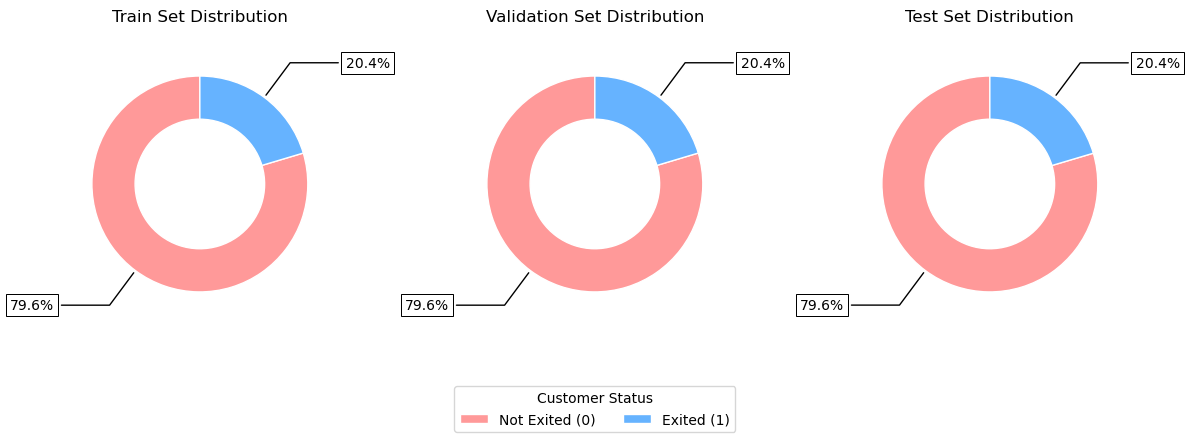

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def compare_distributions(train, validation, test, target_col='Exited'):
    data = {'Train': train,'Validation': validation ,'Test': test}

    # Compute normalized value counts for each dataset
    distributions = {name: df[target_col].value_counts(normalize=True)
                     for name, df in data.items()}
    comparison_df = pd.DataFrame(distributions).fillna(0)
    print("Target Variable Distribution (Proportions):")
    print(comparison_df)

    # Create donut charts
    fig, axes = plt.subplots(1, 3, figsize=(12, 5))
    colors = ['#ff9999', '#66b3ff']  # Red for 0, Blue for 1

    for ax, (name, df) in zip(axes, data.items()):
        # Calculate proportions
        counts = df[target_col].value_counts(normalize=True).sort_index()

        # Create pie chart
        wedges, texts = ax.pie(counts,
                              colors=colors,
                              startangle=90,
                              wedgeprops=dict(width=0.4, edgecolor='w'))

        # Add donut center
        center_circle = plt.Circle((0,0), 0.2, fc='white')
        ax.add_artist(center_circle)

        # Add percentages
        bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
        kw = dict(arrowprops=dict(arrowstyle="-"),
                 bbox=bbox_props,
                 zorder=0,
                 va="center")

        for i, p in enumerate(wedges):
            ang = (p.theta2 - p.theta1)/2. + p.theta1
            y = np.sin(np.deg2rad(ang))
            x = np.cos(np.deg2rad(ang))
            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
            connectionstyle = f"angle,angleA=0,angleB={ang}"
            kw["arrowprops"].update({"connectionstyle": connectionstyle})
            ax.annotate(f'{counts[i]*100:.1f}%',
                       xy=(x, y),
                       xytext=(1.35*np.sign(x), 1.4*y),
                       horizontalalignment=horizontalalignment,
                       **kw)

        ax.set_title(f'{name} Set Distribution', pad=20)

    # Add legend
    labels = [f'Not Exited (0)', f'Exited (1)']
    fig.legend(wedges, labels, title='Customer Status',
              loc='center', bbox_to_anchor=(0.5, 0.05), ncol=2)

    plt.tight_layout()
    plt.show()

compare_distributions(train_set, validation_set, test_set, target_col='Exited')

### Data Cleaning

In [10]:
#Make a copy of training data
trial=train_set
trial.head()

RowNumber  CustomerId Surname  CreditScore Geography  Gender  Age  \
471         472    15623202  Maslov          703    France    Male   37   
1870       1871    15762793   Jones          624     Spain    Male   33   
8383       8384    15665766   T'ang          493    France  Female   36   
3685       3686    15597885    Kerr          695     Spain  Female   39   
1194       1195    15794273    Hand          764    France  Female   24   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
471        1  149762.08              1          1               0   
1870       6       0.00              2          0               0   
8383       5  148667.81              2          1               0   
3685       5       0.00              2          0               0   
1194       7       0.00              2          1               0   

      EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
471          20629.40       1         1                   3   DIAMOND   
1870         76551.70       0         0                   5      GOLD   
8383         56092.51       0         0                   4   DIAMOND   
3685        102763.69       0         0                   3   DIAMOND   
1194        186105.99       0         0                   1    SILVER   

      Point Earned  
471            371  
1870           566  
8383           921  
3685           320  
1194           410

In [11]:
#No missing values in any of the variables
trial.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [12]:
#The dataset contains intergers variables and objects (Surname & Geography & Gender & Card Type). Binary (HasCrCard, IsActiveMember, Complain)
trial.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [13]:
#Drop useless variables
trial=trial.drop(columns=['RowNumber', 'CustomerId' ,'Surname'])

## 1. Data Exploration Analysis

- **Target Variable Analysis:**
  - **Exited Distribution:**
    - Calculate counts and percentages for the target variable.
    - Visualize the distribution using a donut pie chart that displays both percentage and absolute count for each category.

- **Categorical Variable Analysis:**
  - **Geography:**
    - Create a stacked bar chart to show customer distribution by geography, differentiating between exited and non-exited groups.
    - Annotate the bars with percentage labels to highlight the proportion of exited customers.
  - **Gender:**
    - Generate a stacked bar chart illustrating the distribution of exited versus non-exited customers by gender.
    - Display internal percentage labels for both groups.
  - **Card Type:**
    - Visualize the distribution of card types using a bar chart that shows exit percentages.
    - Further analyze by creating a stacked bar chart comparing exited and non-exited counts for each card type.
  - **Other Categorical Variables:**
    - Examine the relationships for variables like **HasCrCard**, **IsActiveMember**, and **Complain** using cross-tabulations.
    - Plot bar charts to depict the percentage distribution of exited versus non-exited customers for these features.

- **Numerical Variable Analysis:**
  - **Descriptive Statistics & Distribution:**
    - Summarize key numerical features (e.g., Age, Balance, EstimatedSalary) with descriptive statistics.
    - Visualize the distribution of these variables using histograms.
  - **Correlation & Interaction:**
    - Generate scatter matrices and box plots (segmented by exited status) to inspect relationships and potential interactions among numerical features.
  - **Noise Filtering:**
    - Address noise in the **EstimatedSalary** feature by temporarily categorizing salary groups and then filtering out entries below a set threshold to improve data quality.

### Target Variable Analysis

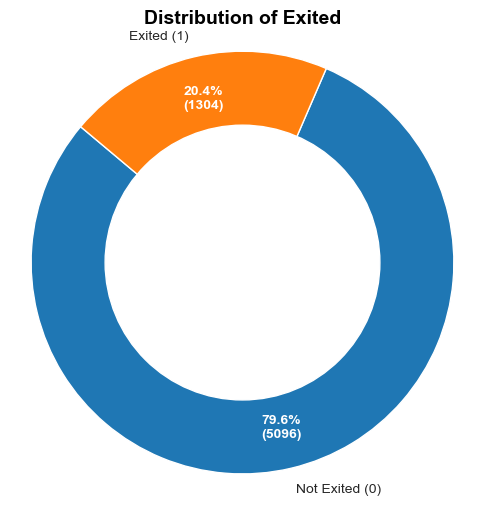

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = trial['Exited'].value_counts()
percentages = trial['Exited'].value_counts(normalize=True) * 100

# Define colors
colors = ['#1f77b4', '#ff7f0e']

# Calculate total for displaying counts
total = sum(counts)

# Create the figure
fig, ax = plt.subplots(figsize=(6, 6))
sns.set_style('whitegrid')

# Function to display both % and count in the pie slices
def make_autopct(counts):
    def my_autopct(pct):
        # Calculate absolute count from percentage
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count})'
    return my_autopct

labels = [f'Not Exited (0)', f'Exited (1)']
wedges, texts, autotexts = ax.pie(
    counts,
    labels=labels,
    startangle=140,         # rotate start angle
    colors=colors,
    pctdistance=0.8,        # position of the percentage labels
    autopct=make_autopct(counts)
)

# Create a "donut hole" by drawing a white circle in the center
center_circle = plt.Circle((0, 0), 0.65, fc='white')
fig.gca().add_artist(center_circle)

# Style the text
for text in autotexts:
    text.set_color('white')    # White text over colored wedges
    text.set_fontweight('bold')

# Title
ax.set_title('Distribution of Exited', fontsize=14, fontweight='bold')

# Make sure it’s a circle
plt.axis('equal')

# Remove spines
sns.despine(left=True, bottom=True)

plt.show()

### Categorical Variables Analysis

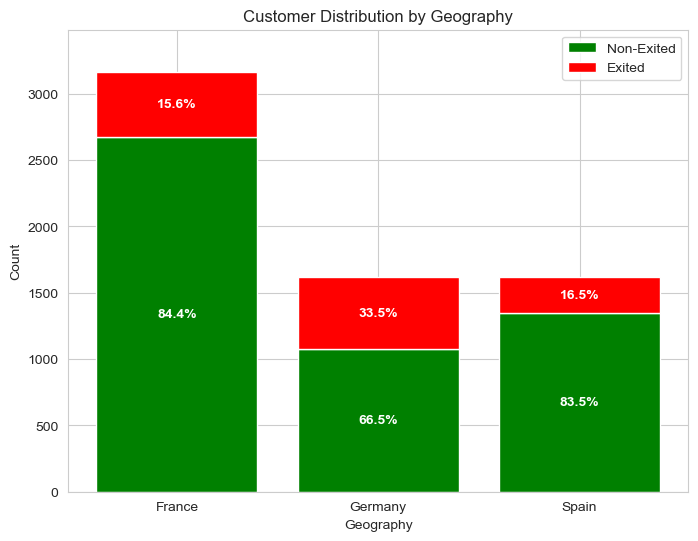

In [15]:
import matplotlib.pyplot as plt

geo_counts = trial.groupby(['Geography', 'Exited']).size().reset_index(name='Count')
geo_pct_exited = trial.groupby('Geography')['Exited'].mean() * 100
geo_pct_no_exited=100-geo_pct_exited
geo_pivot = geo_counts.pivot(index='Geography', columns='Exited', values='Count').fillna(0)

non_exited_count = geo_pivot[0]
exited_count = geo_pivot[1]
geographies = non_exited_count.index.tolist()

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(geographies, non_exited_count, label='Non-Exited', color='green')
ax.bar(geographies, exited_count, bottom=non_exited_count, label='Exited', color='red')

for geo in geographies:
    exited_pct = geo_pct_exited.loc[geo]
    non_exited_pct = geo_pct_no_exited.loc[geo]
    non_exited_val = non_exited_count.loc[geo]
    exited_val = exited_count.loc[geo]
    label_position_non = non_exited_val / 2
    label_position_exited = non_exited_val + exited_val / 2

    ax.text(geo, label_position_non, f'{non_exited_pct:.1f}%', ha='center', va='center',
            color='white', fontweight='bold')
    ax.text(geo, label_position_exited, f'{exited_pct:.1f}%', ha='center', va='center',
            color='white', fontweight='bold')

ax.set_xlabel('Geography')
ax.set_ylabel('Count')
ax.set_title('Customer Distribution by Geography')
ax.set_ylim(0, (non_exited_count + exited_count).max() * 1.1)
ax.legend()

plt.show()


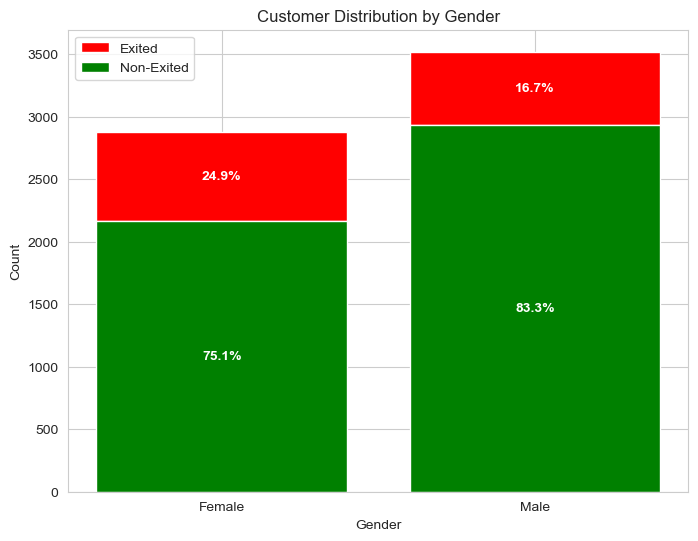

In [16]:
# Calculate counts for each gender and exited status
gender_exited_counts = trial.groupby(['Gender', 'Exited']).size().unstack(fill_value=0)

# Calculate total counts for each gender
gender_total = gender_exited_counts.sum(axis=1)

# Calculate percentages for Non-Exited (0) and Exited (1)
non_exited_pct = (gender_exited_counts[0] / gender_total * 100).round(1)
exited_pct = (gender_exited_counts[1] / gender_total * 100).round(1)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(gender_exited_counts.index, gender_exited_counts[1], bottom=gender_exited_counts[0], label='Exited', color='red')
ax.bar(gender_exited_counts.index, gender_exited_counts[0], label='Non-Exited', color='green')

for i, gender in enumerate(gender_exited_counts.index):
    label_position_non = gender_exited_counts.loc[gender, 0] / 2
    ax.text(i, label_position_non, f'{non_exited_pct[gender]:.1f}%',
            ha='center', va='center', color='white', fontweight='bold')
    label_position_exited = gender_exited_counts.loc[gender, 0] + (gender_exited_counts.loc[gender, 1] / 2)
    ax.text(i, label_position_exited, f'{exited_pct[gender]:.1f}%',
            ha='center', va='center', color='white', fontweight='bold')

ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Customer Distribution by Gender')
ax.legend()
plt.show()

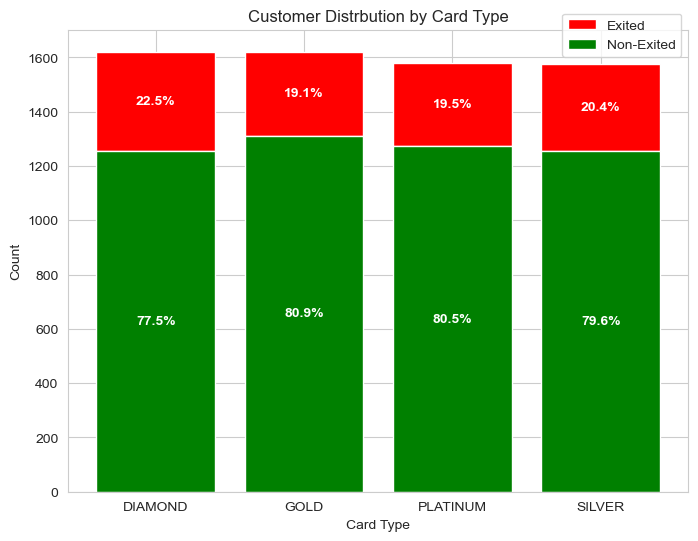

In [17]:
# Calculate counts for each Card Type and Exited status
card_exited_counts = trial.groupby(['Card Type', 'Exited']).size().unstack(fill_value=0)

card_total = card_exited_counts.sum(axis=1)
non_exited_pct = (card_exited_counts[0] / card_total * 100).round(1)
exited_pct = (card_exited_counts[1] / card_total * 100).round(1)

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(card_exited_counts.index, card_exited_counts[1],
       bottom=card_exited_counts[0], label='Exited', color='red')
ax.bar(card_exited_counts.index, card_exited_counts[0],
       label='Non-Exited', color='green')

for i, card in enumerate(card_exited_counts.index):
    # Non-Exited percentage label
    label_position_non = card_exited_counts.loc[card, 0] / 2
    ax.text(i, label_position_non, f'{non_exited_pct[card]:.1f}%',
            ha='center', va='center', color='white', fontweight='bold')

    # Exited percentage label
    label_position_exited = card_exited_counts.loc[card, 0] + (card_exited_counts.loc[card, 1] / 2)
    ax.text(i, label_position_exited, f'{exited_pct[card]:.1f}%',
            ha='center', va='center', color='white', fontweight='bold')

ax.set_xlabel('Card Type')
ax.set_ylabel('Count')
ax.set_title('Customer Distrbution by Card Type')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.05))
plt.show()

### Binary Variables Analysis

Exited             0          1  Total Count
HasCrCard                                   
0          78.841042  21.158958         1881
1          79.951317  20.048683         4519


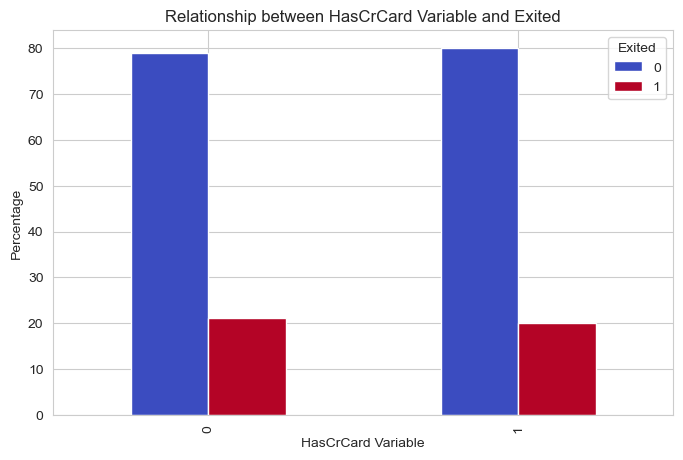

In [18]:
#HasCrCard: Is imbalance the amount of people who dont have a credit card, but the average attrition is similar for both categories
cross_tab = pd.crosstab(trial['HasCrCard'], trial['Exited'], normalize='index') * 100
cross_tab['Total Count'] = trial['HasCrCard'].value_counts()
print(cross_tab)
    #Graph
cross_tab = pd.crosstab(trial['HasCrCard'], trial['Exited'], normalize='index') * 100
cross_tab.plot(kind='bar', figsize=(8,5), colormap='coolwarm')
plt.xlabel('HasCrCard Variable')
plt.ylabel('Percentage')
plt.title('Relationship between HasCrCard Variable and Exited')
plt.legend(title="Exited")
plt.show()

Exited                  0          1  Total Count
IsActiveMember                                   
0               73.507583  26.492417         3099
1               85.368070  14.631930         3301


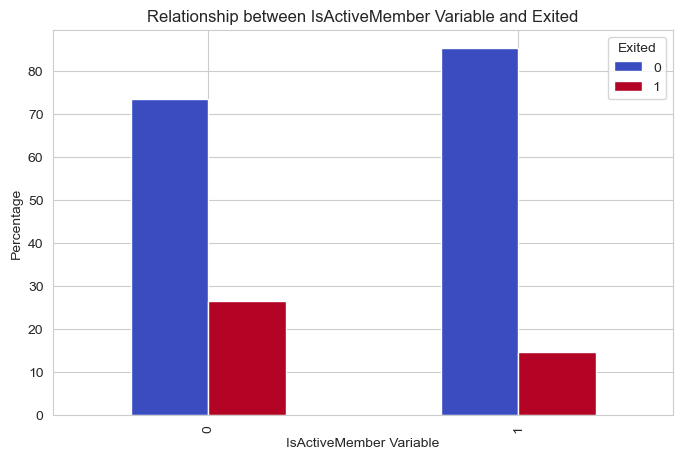

In [19]:
#IsActiveMember: The data is balance for the category. The average attrition is higher for not active members
cross_tab = pd.crosstab(trial['IsActiveMember'], trial['Exited'], normalize='index') * 100
cross_tab['Total Count'] = trial['IsActiveMember'].value_counts()
print(cross_tab)
    #Graph
cross_tab = pd.crosstab(trial['IsActiveMember'], trial['Exited'], normalize='index') * 100
cross_tab.plot(kind='bar', figsize=(8,5), colormap='coolwarm')
plt.xlabel('IsActiveMember Variable')
plt.ylabel('Percentage')
plt.title('Relationship between IsActiveMember Variable and Exited')
plt.legend(title="Exited")
plt.show()

Exited            0          1  Total Count
Complain                                   
0         99.960715   0.039285         5091
1          0.534759  99.465241         1309


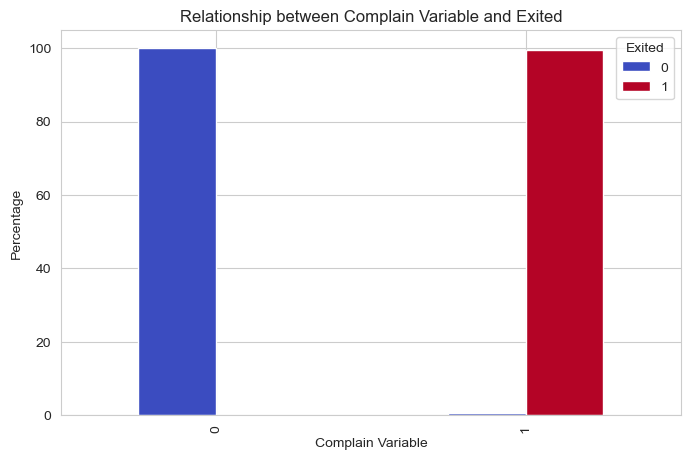

In [20]:
#Complain: Low number of people who complain, however excibit a high attrition. While if there is not complain, the attrition is low.
cross_tab = pd.crosstab(trial['Complain'], trial['Exited'], normalize='index') * 100
cross_tab['Total Count'] = trial['Complain'].value_counts()
print(cross_tab)
    #Graph
cross_tab = pd.crosstab(trial['Complain'], trial['Exited'], normalize='index') * 100
cross_tab.plot(kind='bar', figsize=(8,5), colormap='coolwarm')
plt.xlabel('Complain Variable')
plt.ylabel('Percentage')
plt.title('Relationship between Complain Variable and Exited')
plt.legend(title="Exited")
plt.show()

### Numerical Variables Analysis

In [21]:
numerical_trial = trial.select_dtypes(include=['number']).drop(['IsActiveMember','Exited','Complain','HasCrCard'], axis=1)

In [22]:
#Age: The standard devition is high due to extreme values
#Balance: There is high volatility influence by high values in the right extreme
#EstimatedSalary: The minimum values are not significant, can be for a bad estimation of salary. The high ends looks more well distributed than the left side
numerical_trial.describe()

CreditScore          Age       Tenure        Balance  NumOfProducts  \
count  6400.000000  6400.000000  6400.000000    6400.000000    6400.000000   
mean    650.849687    38.920469     4.981406   76596.858272       1.528281   
std      96.430456    10.532935     2.883550   62308.596746       0.579765   
min     350.000000    18.000000     0.000000       0.000000       1.000000   
25%     584.000000    32.000000     2.000000       0.000000       1.000000   
50%     652.000000    37.000000     5.000000   97267.100000       1.000000   
75%     718.000000    44.000000     7.000000  127809.812500       2.000000   
max     850.000000    92.000000    10.000000  222267.630000       4.000000   

       EstimatedSalary  Satisfaction Score  Point Earned  
count      6400.000000         6400.000000   6400.000000  
mean      99318.781064            3.001562    603.738281  
std       57550.332628            1.408233    225.622531  
min          11.580000            1.000000    119.000000  
25%       49802.107500            2.000000    407.000000  
50%       98815.585000            3.000000    600.000000  
75%      148519.482500            4.000000    797.000000  
max      199992.480000            5.000000   1000.000000

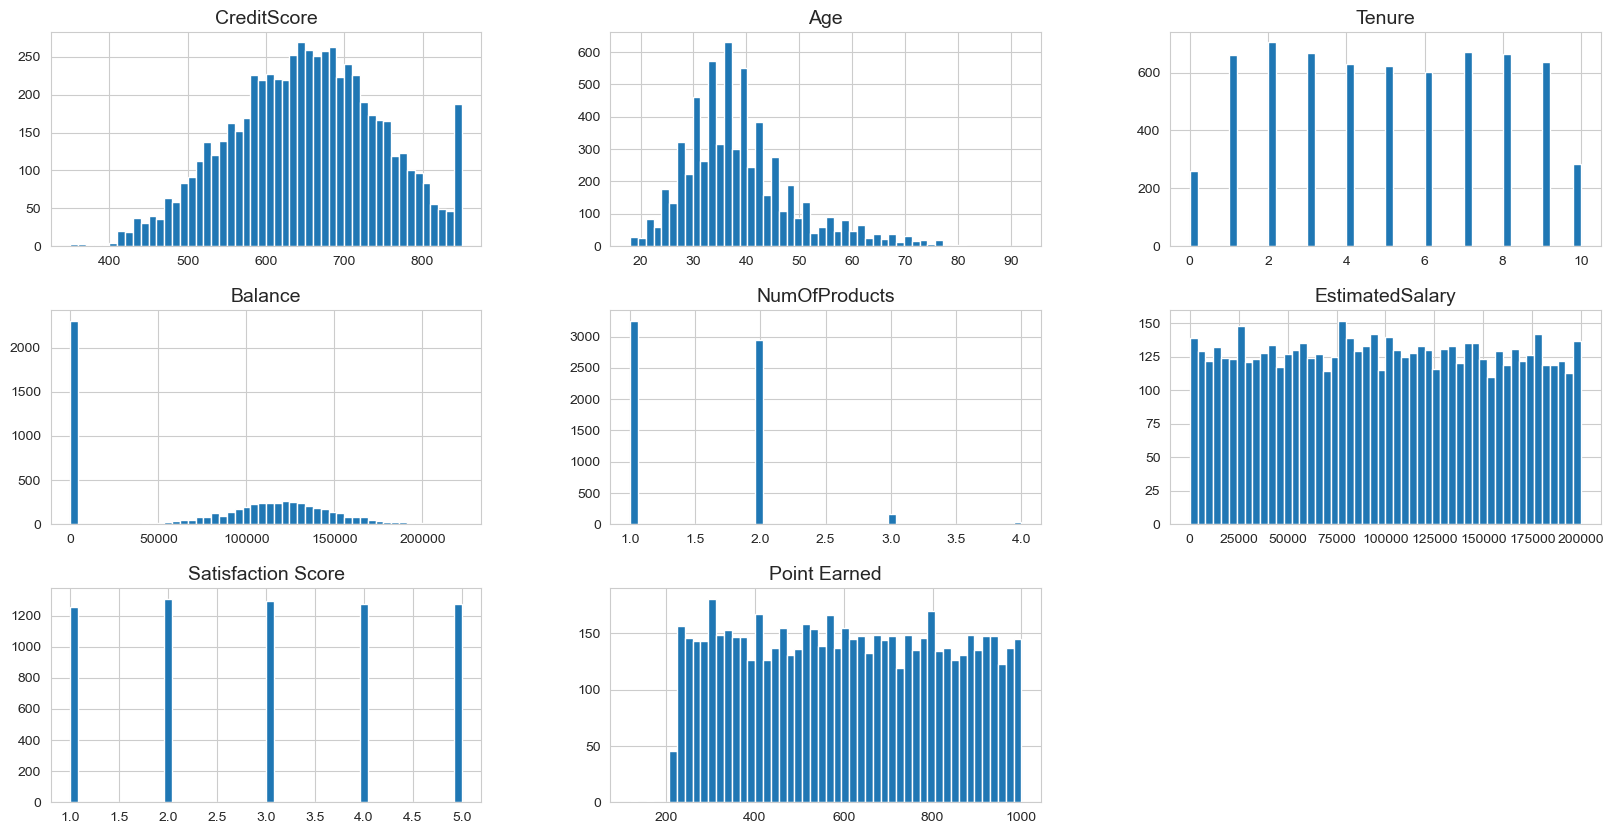

In [23]:
#Age: Distribution skew to the right
#Balance: Accumulate values in cero, and after that have another normal distribution. Possible to differenciate between having or not any amount in the balance
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

numerical_trial.hist(bins=50, figsize=(20, 10))
plt.show()

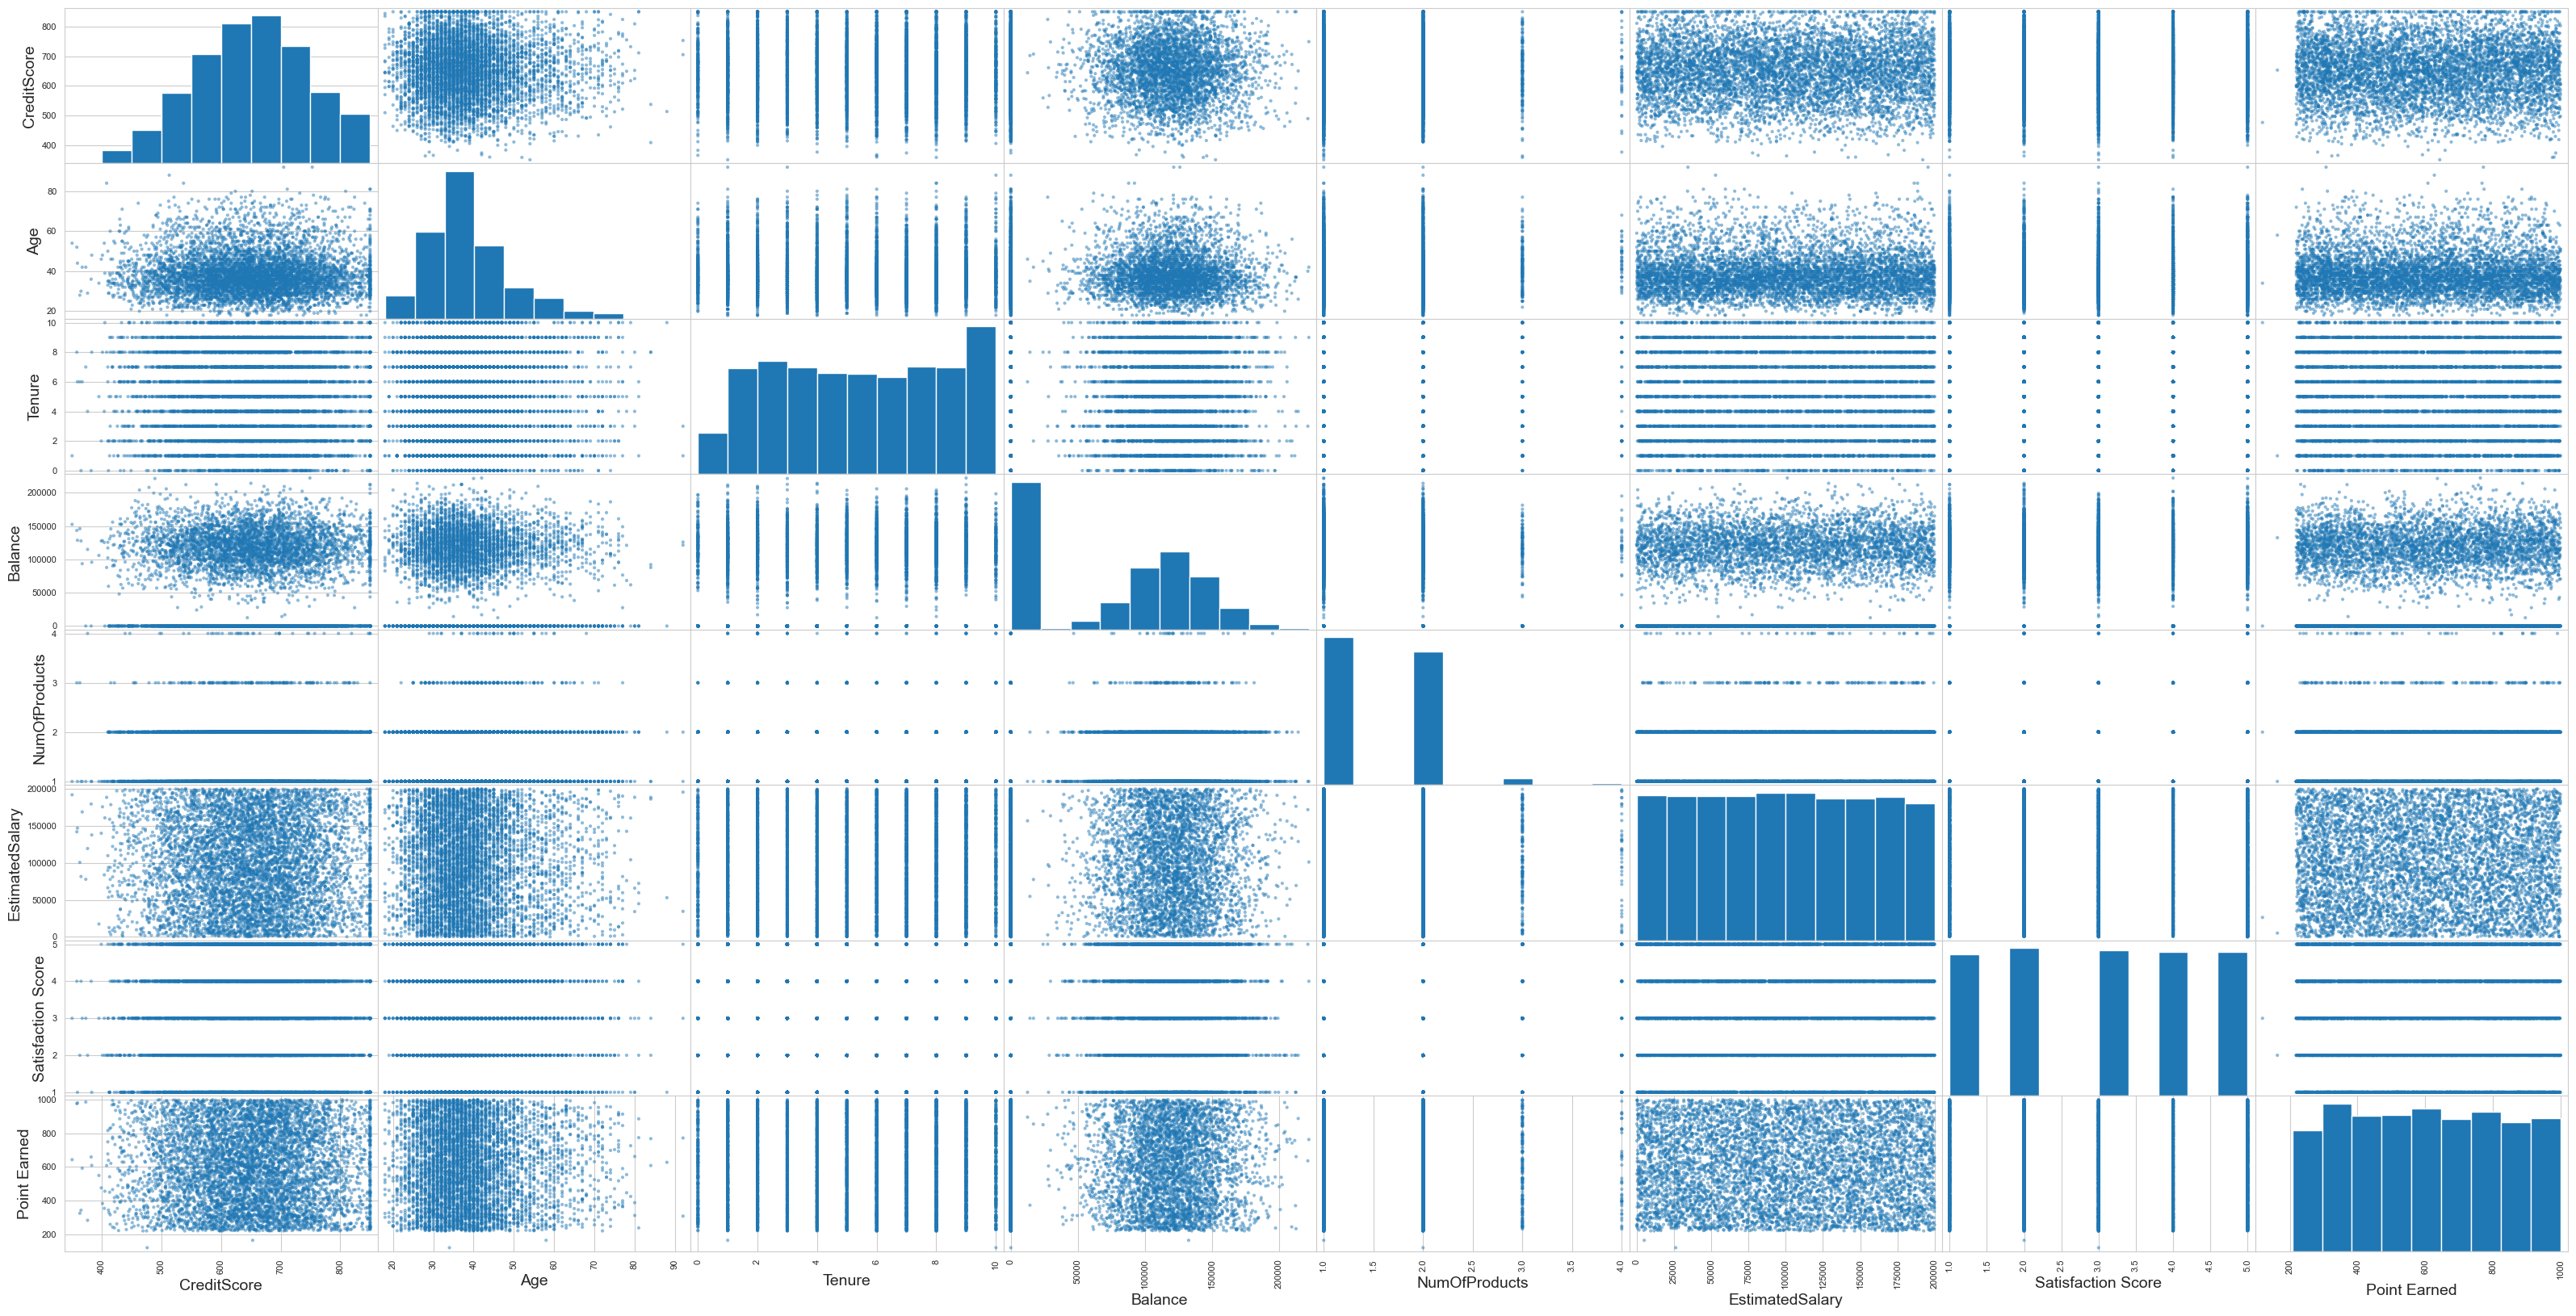

In [24]:
#There is not a clear relationship between variables that may indicate any time of interaction
from pandas.plotting import scatter_matrix
scatter_matrix(numerical_trial, figsize=(40, 20))
plt.show()

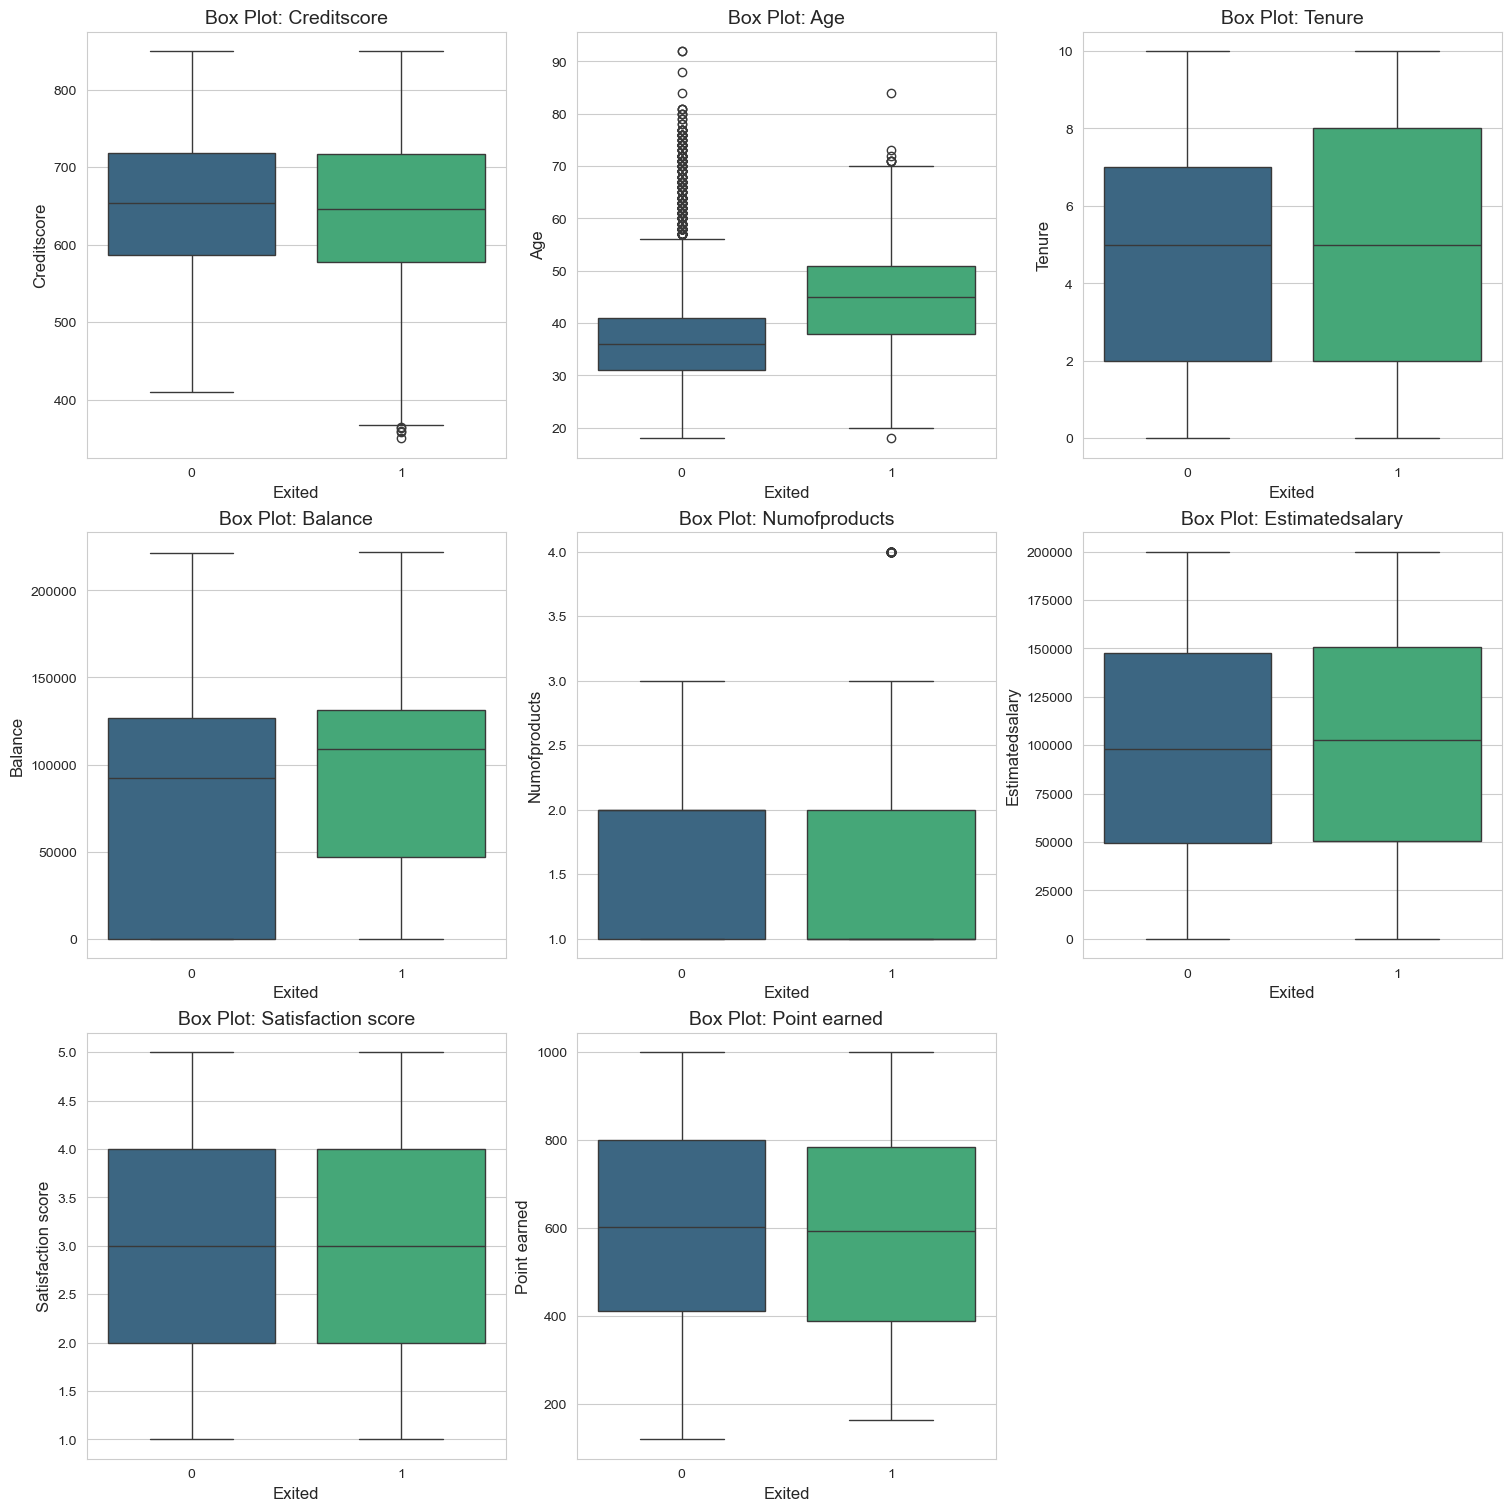

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Identify numeric columns excluding the binary target ('popular')
num_columns = [col for col in numerical_trial]

# Define the number of plots per row
n_cols = 3
n_rows = (len(num_columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create a figure and subplots with constrained layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Create box plots for each numerical variable
for idx, column in enumerate(numerical_trial):
    ax = axes[idx]  # Select the current subplot

    # Create a box plot grouped by the 'popular' column
    sns.boxplot(data=trial, x='Exited', y=column, hue='Exited', ax=ax, palette='viridis')
    if ax.get_legend() is not None:
        ax.get_legend().remove()

    # Add titles and labels
    ax.set_title(f'Box Plot: {column.capitalize()}', fontsize=14)
    ax.set_xlabel('Exited', fontsize=12)
    ax.set_ylabel(column.capitalize(), fontsize=12)

# Remove any unused subplots
for idx in range(len(num_columns), len(axes)):
    fig.delaxes(axes[idx])

# Display the plots
plt.show()



In [26]:
#Estimated Salary
import numpy as np
trial['salary_group'] = np.where(trial['EstimatedSalary'] < 1000, 'Below 1000', 'Above 1000')
cross_tab = pd.crosstab(trial['salary_group'], trial['Exited'], normalize='index')*100
cross_tab['Total Count'] = trial['salary_group'].value_counts()
print(cross_tab)
trial=trial.drop(columns=['salary_group'])
trial = trial[trial['EstimatedSalary'] >= 1000] #Eliminate this noise

Exited                0          1  Total Count
salary_group                                   
Above 1000    79.676202  20.323798         6362
Below 1000    71.052632  28.947368           38


## 2. Data Preparation, Feature engineering and Pipelines

- **Balance Feature Engineering:**
  - Create a binary variable (`has_balance`) indicating whether the balance is greater than zero.
  - Compute and print a cross-tabulation of `has_balance` versus the target variable (`Exited`), showing percentages and counts.
  - Generate a categorical variable (`balance_cat`) by segmenting nonzero balances into 50 bins.
  - Visualize the distribution of balance categories with a histogram.

- **Interaction Feature Engineering:**
  - Create interaction features:
    - `Tenure_IsActive`: product of `Tenure` and `IsActiveMember`.
    - `Balance_CreditScore`: product of `has_balance` and `CreditScore`.
    - `Age_NumOfProducts`: product of `Age` and `NumOfProducts`.
  - Use boxplots to examine the relationship between these interaction features and the `Exited` variable.

- **Correlation Analysis:**
  - Drop redundant or highly correlated features (e.g., `Balance`) from the dataset.
  - Compute the correlation matrix for numerical variables.
  - Visualize the correlation matrix using a heatmap.

- **Training Set Preprocessing:**
  - Create a new `has_balance` variable in the training set.
  - Remove irrelevant columns such as `RowNumber`, `CustomerId`, `Surname`, `Complain`, and `Balance`.
  - Generate the `Tenure_IsActive` feature.
  - Apply one-hot encoding to categorical variables (e.g., `Geography` and `Gender`), with adjustments to avoid multicollinearity.
  - Encode the `Card Type` variable using a custom mapping.
  - Filter out noise by removing entries with `EstimatedSalary` below a threshold.
  - Detect outliers using an Isolation Forest, and visualize the distribution of outlier probabilities.

- **Handling Class Imbalance:**
  - Implement a resampling pipeline using SMOTE for oversampling and Random Under Sampling to balance the dataset.

- **Custom Preprocessing Pipeline:**
  - Define a `ChurnPreprocessor` class that:
    - Creates the `has_balance` variable.
    - Drops irrelevant columns.
    - Generates the `Tenure_IsActive` feature.
    - Applies one-hot encoding to `Geography` and `Gender` (with proper handling of the gender columns).
    - Encodes the `Card Type` variable.
  - Integrate this custom transformer into a scikit-learn pipeline to streamline data preprocessing for churn modeling.

### Feature Engineering

Exited               0          1  Total Count
has_balance                                   
0            86.425142  13.574858         2291
1            75.878163  24.121837         4071


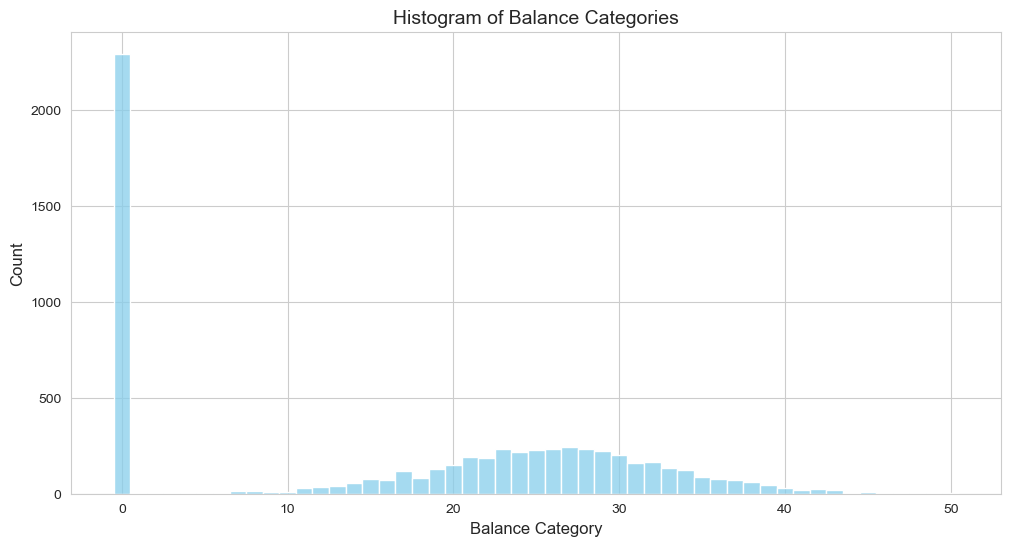

In [27]:
### Balance ###: Separate having or not balance  or make categories according to the balance
#Binary variable( Has balance): people with no balance tend to have a lower attrition
trial['has_balance'] = (trial['Balance'] > 0).astype(int)
cross_tab = pd.crosstab(trial['has_balance'], trial['Exited'], normalize='index') * 100
cross_tab['Total Count'] = trial['has_balance'].value_counts()
print(cross_tab)

#Create a new categorical variable for balance
balance_cat = pd.Series(np.nan, index=trial.index)
balance_cat[trial['Balance'] == 0] = 0
nonzero_mask = trial['Balance'] != 0
bins = pd.cut(trial.loc[nonzero_mask, 'Balance'],bins=50,labels=range(1, 51))
balance_cat.loc[nonzero_mask] = pd.to_numeric(bins)
trial['balance_cat'] = balance_cat.astype(int)

    #Graph
plt.figure(figsize=(12, 6))
sns.histplot(trial['balance_cat'], bins=51, discrete=True, color='skyblue')
plt.title('Histogram of Balance Categories', fontsize=14)
plt.xlabel('Balance Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


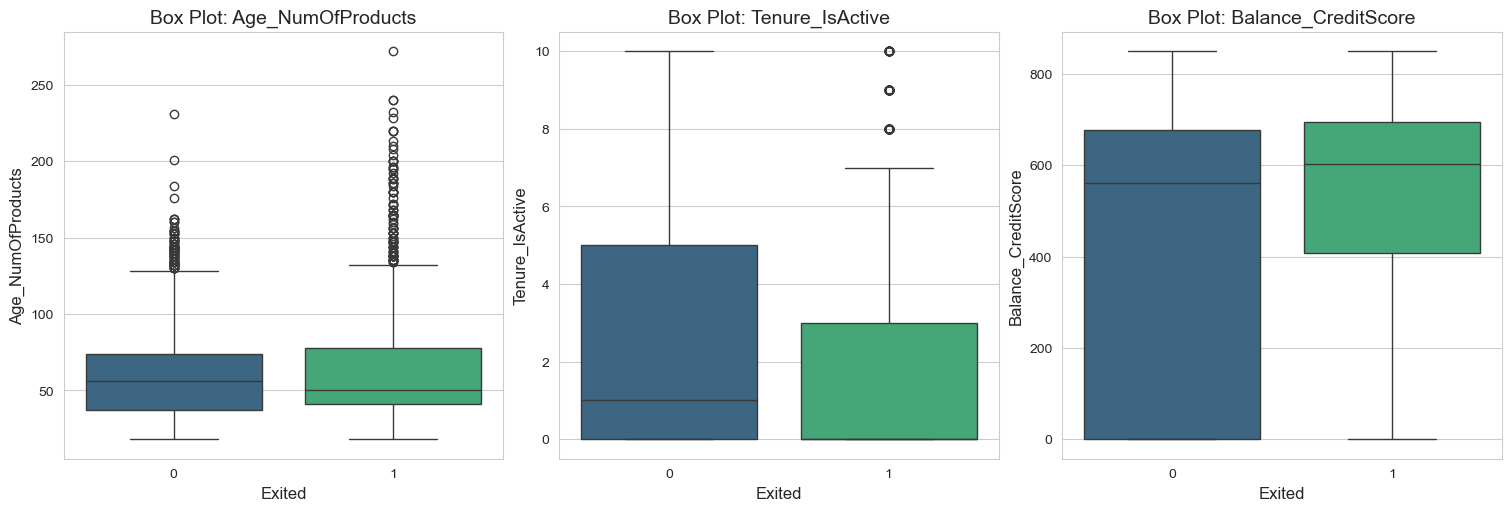

In [28]:
### Possible Interactions
trial['Tenure_IsActive'] = trial['Tenure'] * trial['IsActiveMember']  # A 10-year inactive customer is more likely to leave than a 2-year active customer.
trial['Balance_CreditScore'] = trial['has_balance'] * trial['CreditScore']  # A customer with a positive balance and good credit might leave because more options available.
trial['Age_NumOfProducts'] = trial['Age'] * trial['NumOfProducts']  # A 25-year-old with 1 product is more likely to churn than a 50-year-old with 3 products.

interaction_vars = ['Age_NumOfProducts', 'Tenure_IsActive', 'Balance_CreditScore']

# Define number of plots per row
n_cols = 3
n_rows = 1  # Since we have only 3 interactions

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5), constrained_layout=True)
axes = axes.flatten()

for idx, column in enumerate(interaction_vars):
    sns.boxplot(data=trial, x='Exited', y=column, hue='Exited', palette='viridis', ax=axes[idx])
    axes[idx].set_title(f'Box Plot: {column}', fontsize=14)
    axes[idx].set_xlabel('Exited', fontsize=12)
    axes[idx].set_ylabel(column, fontsize=12)
    # Remove the legend to avoid redundancy
    axes[idx].legend_.remove()

plt.show()


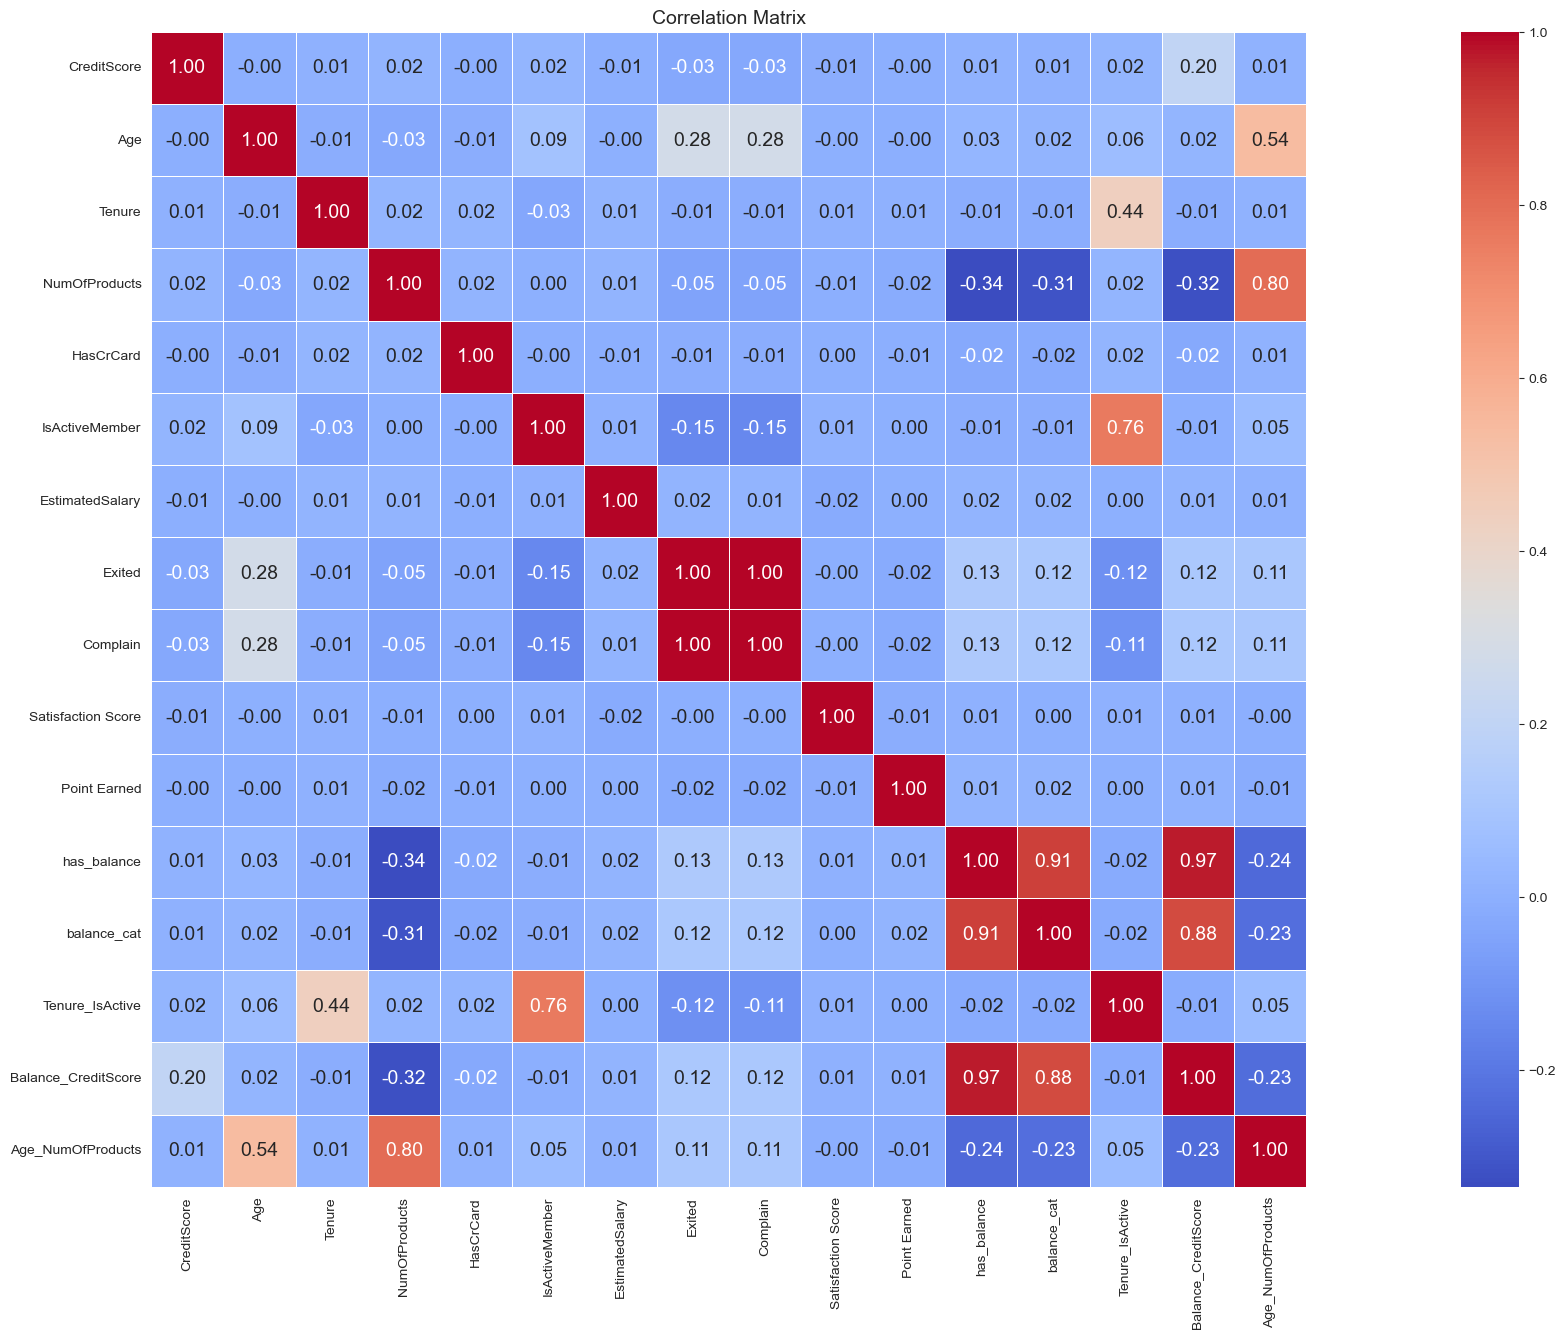

In [29]:
#Correlation matrix
trial=trial.drop(columns=['Balance'])
    #Complain and Exited are perfectly correlated should be drop
    #Balance_CreditScore is highly corralated with another, therefore this new variable wont be used
    #Age_NumOfProducts is highly corralted, then should be drop
df_num = trial.select_dtypes(include=['number'])
correlation_matrix = df_num.corr()
plt.figure(figsize=(40, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.4)
plt.title('Correlation Matrix')
plt.show()


### Data Preparation

In [30]:
#train_set, validation_set, test_set
train_set_2=train_set
#1. Create a new variable (has balance)
train_set_2['has_balance'] = (train_set_2['Balance'] > 0).astype(int)
#2. Drop irrelevant columns
train_set_2=train_set_2.drop(columns=['RowNumber', 'CustomerId' ,'Surname','Complain','Balance'])
#3. Create a new variable
train_set_2['Tenure_IsActive'] = train_set_2['Tenure'] * train_set_2['IsActiveMember']
#4. One-Hot encoding of categorical variables (Geography, gender)
train_set_2 = pd.get_dummies(train_set_2, columns=['Geography'], drop_first=True)
train_set_2= pd.get_dummies(train_set_2, columns=['Gender'], drop_first=False)
train_set_2=train_set_2.drop(columns=['Gender_Male'])
#5. Encoding (Card Type)
mapping = {'SILVER': 0, 'GOLD': 1, 'PLATINUM': 2, 'DIAMOND': 3}
train_set_2['Card_Type_encoded'] = train_set_2['Card Type'].map(mapping)
train_set_2 = train_set_2.drop(columns=['Card Type'])

Threshold for 5% most anomalous points: -1.650581340578933e-17
      anomaly_score  outlier_probability  is_outlier
471               1            -0.090728           0
1870              1            -0.062490           0
8383              1            -0.077907           0
3685              1            -0.051685           0
1194              1            -0.026749           0


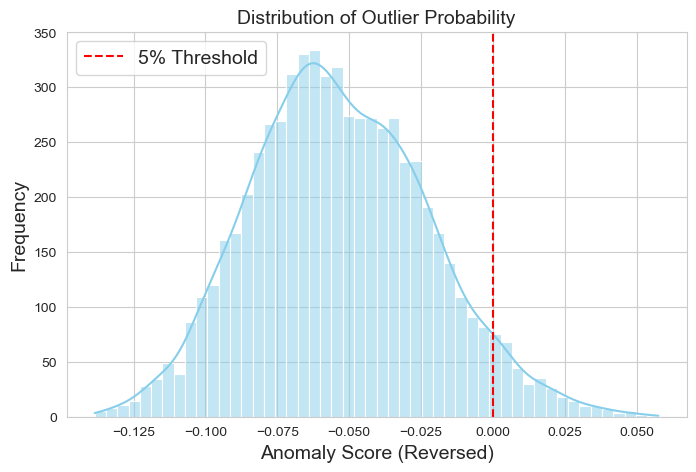

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#6. Delete the noise values from the training
train_set_2 = train_set_2[train_set_2['EstimatedSalary'] >= 1000]
#7. Outliers detection : No need to delete outliers
from sklearn.ensemble import IsolationForest
features = train_set_2.drop(columns=['Exited'])
num_columns = features.select_dtypes(include=['number']).columns
X = features[num_columns]
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X)
scores = iso_forest.decision_function(X)
threshold_5_percentile = np.percentile(scores, 5)
train_set_2['anomaly_score'] = iso_forest.predict(X)
train_set_2['outlier_probability'] = -scores  # Reverse scores so that higher = more anomalous
train_set_2['is_outlier'] = (scores <= threshold_5_percentile).astype(int)
    # Display threshold and sample results
print(f"Threshold for 5% most anomalous points: {threshold_5_percentile}")
print(train_set_2[['anomaly_score', 'outlier_probability', 'is_outlier']].head())
    #Visualization
plt.figure(figsize=(8, 5))
sns.histplot(train_set_2['outlier_probability'], bins=50, kde=True, color='skyblue')
plt.axvline(x=-threshold_5_percentile, color='red', linestyle='--', label="5% Threshold")
plt.title("Distribution of Outlier Probability")
plt.xlabel("Anomaly Score (Reversed)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
train_set_2 = train_set_2.drop(columns=['anomaly_score', 'outlier_probability', 'is_outlier'])

#8. Split the data target (Exited) vs predicting variables
y_train = train_set_2['Exited']
x_train = train_set_2.drop(columns=['Exited'])

In [ ]:
#pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [134]:
#9. Dealing with imbalanced data
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),
    ('under', RandomUnderSampler(sampling_strategy=1.0, random_state=42))
])
x_res, y_res = pipeline.fit_resample(x_train, y_train)

### Pipeline

In [33]:
#Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# Define a custom transformer for churn preprocessing
class ChurnPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Mapping for Card Type encoding
        self.mapping = {'SILVER': 0, 'GOLD': 1, 'PLATINUM': 2, 'DIAMOND': 3}

    def fit(self, X, y=None):
        # No fitting needed; simply return self
        return self

    def transform(self, X):
        # Work on a copy of the DataFrame
        df = X.copy()

        # 1. Create a new variable 'has_balance'
        df['has_balance'] = (df['Balance'] > 0).astype(int)

        # 2. Drop irrelevant columns
        df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Complain', 'Balance'])

        # 3. Create a new variable 'Tenure_IsActive'
        df['Tenure_IsActive'] = df['Tenure'] * df['IsActiveMember']

        # 4. One-Hot Encoding of categorical variables
        #    a. Geography: drop the first dummy (avoiding multicollinearity)
        df = pd.get_dummies(df, columns=['Geography'], drop_first=True)
        #    b. Gender: perform one-hot encoding, then drop 'Gender_Male' to keep only Female indicator
        df = pd.get_dummies(df, columns=['Gender'], drop_first=False)
        if 'Gender_Male' in df.columns:
            df = df.drop(columns=['Gender_Male'])

        # 5. Encoding for Card Type with the specified mapping
        df['Card_Type_encoded'] = df['Card Type'].map(self.mapping)
        df = df.drop(columns=['Card Type'])

        return df

# Create the preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('churn_preprocessor', ChurnPreprocessor())
])


## 3. Modelling

- **Data Preparation & Resampling:**
  - Preprocess the training and test sets using a custom pipeline.
  - Filter out noise by removing entries with an EstimatedSalary below 1000.
  - Separate the target variable (Exited) and apply SMOTE with under sampling to balance the training data.
  - Display class distribution before and after resampling.

- **Random Forest Modeling:**
  - Use GridSearchCV on the resampled training data to optimize Random Forest hyperparameters (e.g., n_estimators, max_depth, min_samples_split, min_samples_leaf) with recall as the scoring metric.
  - Evaluate the best Random Forest model on the test set, plot the ROC curve, compute the AUC, and visualize feature importances.
  - Extract the top 6 features from the best model, re-run grid search using only these features, and reassess model performance.

- **XGBoost Modeling:**
  - Start with RandomizedSearchCV to narrow the parameter range for an XGBoost classifier.
  - Follow up with GridSearchCV using a refined parameter grid to fine-tune the model.
  - Evaluate the tuned XGBoost model on the test set, plot feature importances, and extract the top 8 features.
  - Re-run grid search on these top features, plot the ROC curve, compute the AUC, and determine an optimal classification threshold to adjust predictions.

- **Logistic Regression:** 
  - Tune hyperparameters (regularization strength and solver) using GridSearchCV and evaluate the model on the test set.

- **Support Vector Machine (SVC):** 
  - Build an SVC pipeline (with standard scaling), perform grid search over parameters (C, kernel, degree, gamma), and evaluate its performance.

- **Stacking Ensemble:**
  - Combine the best models from Random Forest, XGBoost, and SVM as base estimators in a stacking classifier.
  - Use logistic regression as the final estimator, fit the ensemble on the resampled training data, and evaluate its performance on the test set.

In [34]:
#Training data ready:
training_set = preprocessing_pipeline.fit_transform(train_set)
training_set= training_set[training_set['EstimatedSalary'] >= 1000]
y_train = training_set['Exited']
x_train = training_set.drop(columns=['Exited'])
x_res, y_res = pipeline.fit_resample(x_train, y_train)

In [35]:
#Validation set ready:
validation_set_process=preprocessing_pipeline.transform(validation_set)
y_val = validation_set_process['Exited']
x_val = validation_set_process.drop(columns=['Exited'])
#Test Set ready:
test_set_process=preprocessing_pipeline.transform(test_set)
y_test = test_set_process['Exited']
x_test = test_set_process.drop(columns=['Exited'])

In [36]:
from collections import Counter
# Before resampling
print("Class distribution before resampling:", Counter(y_train))
# After resampling
print("Class distribution after resampling:", Counter(y_res))

Class distribution before resampling: Counter({0: 5069, 1: 1293})
Class distribution after resampling: Counter({0: 2534, 1: 2534})


### 1. Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,            
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(x_res, y_res)

print("Best parameters found:", grid_search.best_params_)
print("Best validation recall: {:.4f}".format(grid_search.best_score_))
best_rf = grid_search.best_estimator_
best_rf_params=grid_search.best_params_

#Print the results for the validation set
print("Evaluate on the validation set:")
y_pred = best_rf.predict(x_val)
print(classification_report(y_val, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best validation recall: 0.7968
Evaluate on the validation set:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1274
           1       0.53      0.67      0.59       326

    accuracy                           0.81      1600
   macro avg       0.72      0.76      0.73      1600
weighted avg       0.83      0.81      0.82      1600



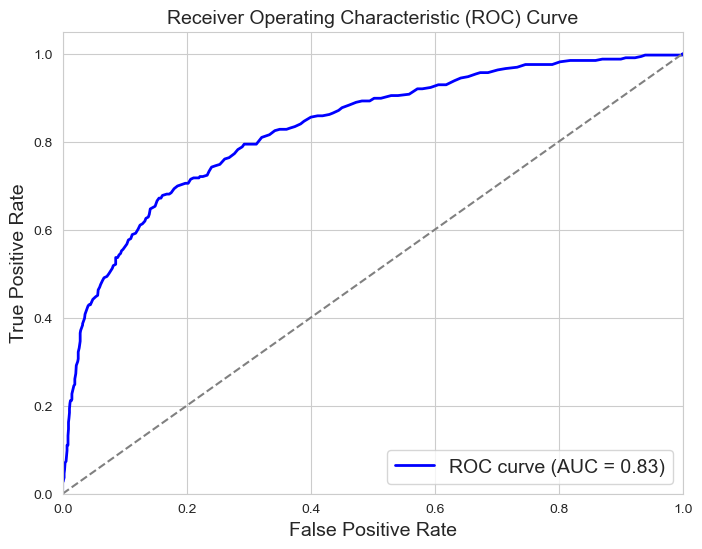

In [88]:
#ROC Curve for this classifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class (1)
y_probs = best_rf.predict_proba(x_val)[:, 1]  # Probability of class 1
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_probs)
# Compute the AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# Find the optimal threshold that maximizes recall while keeping a balance: Dont change

from sklearn.metrics import roc_curve, classification_report
import numpy as np
optimal_idx = np.argmax(tpr - fpr)  # This finds the threshold with the best trade-off
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal classification threshold: {optimal_threshold:.2f}")

# Apply new threshold to make adjusted predictions
y_pred_adjusted = (y_probs >= optimal_threshold).astype(int)

# Print new evaluation metrics
print("Evaluation with Adjusted Threshold:")
print(classification_report(y_val, y_pred_adjusted))

Optimal classification threshold: 0.49
Evaluation with Adjusted Threshold:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1274
           1       0.52      0.68      0.59       326

    accuracy                           0.81      1600
   macro avg       0.71      0.76      0.73      1600
weighted avg       0.83      0.81      0.82      1600



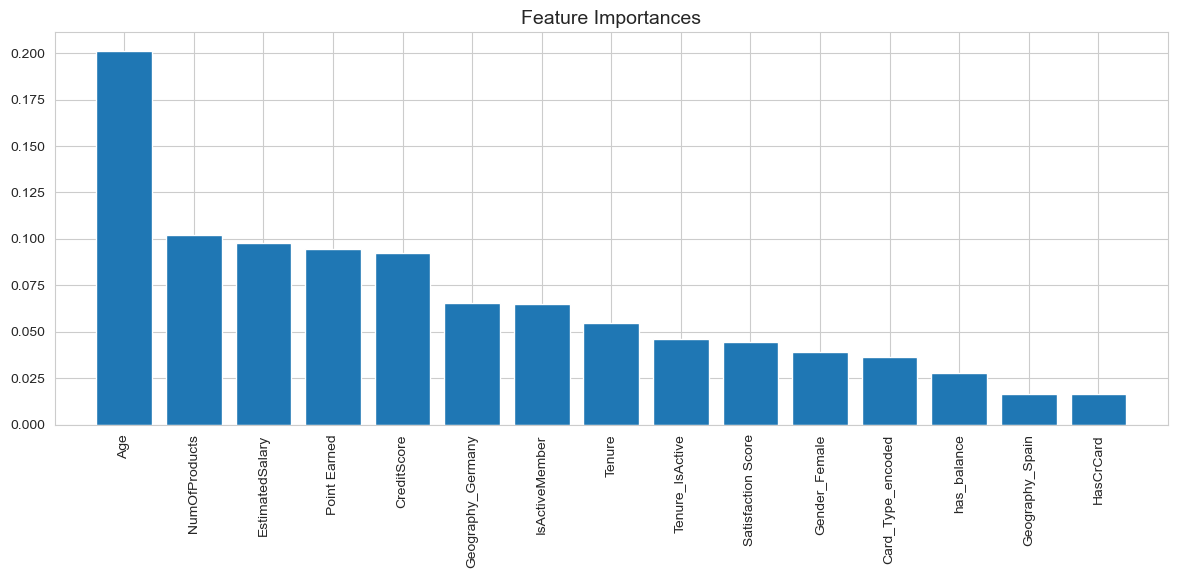

In [56]:
# Get feature importances
importances = best_rf.feature_importances_
feature_names = x_train.columns

# Sort the importances in descending order
indices = np.argsort(importances)[::-1]

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), feature_names[indices], rotation=90)
plt.xlim([-1, len(indices)])
plt.tight_layout()
plt.show()

### 1.5 Random Forest with Top 8 Important Features

In [86]:
# 1. Identify the top 10 features from the best model
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = x_res.columns[indices[:8]]
print("Top 6 features:", top_features.tolist())

# 2. Create a new training dataset with only these top features
X_top = x_res[top_features]

# 3. Re-run grid search using only the top 6 features
grid_search_top = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

grid_search_top.fit(X_top, y_res)

print("Best parameters found:", grid_search_top.best_params_)
print("Best cross-validation recall: {:.4f}".format(grid_search_top.best_score_),'\n')
best_rf_top = grid_search_top.best_estimator_
best_rf_top_params=grid_search_top.best_params_

print("Evaluate on the validation set:")
X_test_top = x_val[top_features]
y_pred_top = best_rf_top.predict(X_test_top)
print(classification_report(y_val, y_pred_top))

Top 6 features: ['Age', 'NumOfProducts', 'EstimatedSalary', 'Point Earned', 'CreditScore', 'Geography_Germany', 'IsActiveMember', 'Tenure']
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation recall: 0.7790 

Evaluate on the validation set:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1274
           1       0.50      0.68      0.58       326

    accuracy                           0.80      1600
   macro avg       0.71      0.75      0.72      1600
weighted avg       0.83      0.80      0.81      1600



### 2. XGBoosting

In [73]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import recall_score, classification_report
from sklearn.model_selection import ParameterGrid

def train_xgb_model_with_early_stopping(x_train, y_train, x_val, y_val, params, early_stopping_rounds=10):
    """
    Train an XGBoost model with early stopping using the proper callback structure for XGBoost 2.1.4.
    """
    # Create a fresh early stopping callback for this training run
    early_stop = xgb.callback.EarlyStopping(
        rounds=early_stopping_rounds,
        save_best=True
    )
    
    # Initialize model with parameters (without callbacks in constructor)
    model = XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        callbacks=[early_stop],
        **params
    )
    
    # Train the model with the callback in the fit method
    model.fit(
        x_train, y_train,
        eval_set=[(x_val, y_val)],
        verbose=False,
    )
    
    return model

# Define the parameter grid with regularization terms (L1 and L2)
param_grid = {
    'n_estimators': [400, 500, 600],
    'max_depth': [10, 14, 20],
    'learning_rate': [0.01, 0.001],
    'subsample': [0.4],
    'colsample_bytree': [0.7],
    'reg_alpha': [0, 1],    # L1 regularization term
    'reg_lambda': [1, 10]    # L2 regularization term
}

# Create all combinations of parameters using ParameterGrid
grid = ParameterGrid(param_grid)

# Initialize variables to store the best results
best_recall = -1.0
best_params = None
best_model = None

# Iterate over each parameter combination in the grid
for params in grid:
    # Train model using our function that handles early stopping correctly
    model = train_xgb_model_with_early_stopping(
        x_res, y_res, 
        x_val, y_val, 
        params
    )
    
    # Predict on the validation set
    y_pred = model.predict(x_val)
    
    # Compute the recall score on the validation set
    current_recall = recall_score(y_val, y_pred)
    print(f"Params: {params} | Recall: {current_recall:.4f}")
    
    # Update the best model if the current model has a higher recall
    if current_recall > best_recall:
        best_recall = current_recall
        best_params = params
        best_model = model

# Assign the best model and parameters
best_xgb = best_model
best_xgb_params = best_params

# Display the best parameters and validation performance
print("\nBest parameters:", best_params)
print(f"Best Recall on validation set: {best_recall:.4f}")
print("\nValidation Set Classification Report:")
print(classification_report(y_val, best_xgb.predict(x_val)))


Params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 400, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.4} | Recall: 0.6656
Params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 400, 'reg_alpha': 0, 'reg_lambda': 10, 'subsample': 0.4} | Recall: 0.6810
Params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 400, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.4} | Recall: 0.6656
Params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 400, 'reg_alpha': 1, 'reg_lambda': 10, 'subsample': 0.4} | Recall: 0.6810
Params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.4} | Recall: 0.6626
Params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 10, 'subsample': 0.4} | Recall: 0.6810
Params: {'colsample

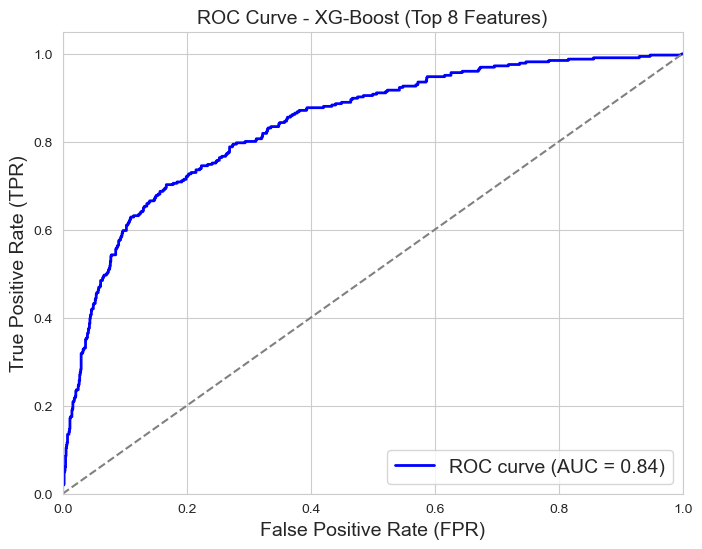

AUC Score: 0.8392


In [113]:
#ROC Curve for XGBoost (Top 8 features)
# Get the predicted probabilities for class 1 (churners)
y_probs = best_xgb.predict_proba(x_val)[:, 1]  # Probability of class 1
fpr_top, tpr_top, thresholds_top = roc_curve(y_val, y_probs)

# Compute the AUC (Area Under Curve)
roc_auc_top = auc(fpr_top, tpr_top)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_top, tpr_top, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_top:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - XG-Boost (Top 8 Features)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print AUC Score
print(f"AUC Score: {roc_auc_top:.4f}")

In [114]:
# Find the optimal threshold that maximizes recall while keeping a balance
optimal_idx = np.argmax(tpr - fpr)  # This finds the threshold with the best trade-off
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal classification threshold: {optimal_threshold:.2f}")

# Apply new threshold to make adjusted predictions
y_pred_adjusted = (y_probs >= optimal_threshold).astype(int)

# Print new evaluation metrics
print("Evaluation with Adjusted Threshold:")
print(classification_report(y_val, y_pred_adjusted))

Optimal classification threshold: 0.49
Evaluation with Adjusted Threshold:
              precision    recall  f1-score   support

           0       0.92      0.80      0.85      1274
           1       0.48      0.72      0.57       326

    accuracy                           0.78      1600
   macro avg       0.70      0.76      0.71      1600
weighted avg       0.83      0.78      0.80      1600



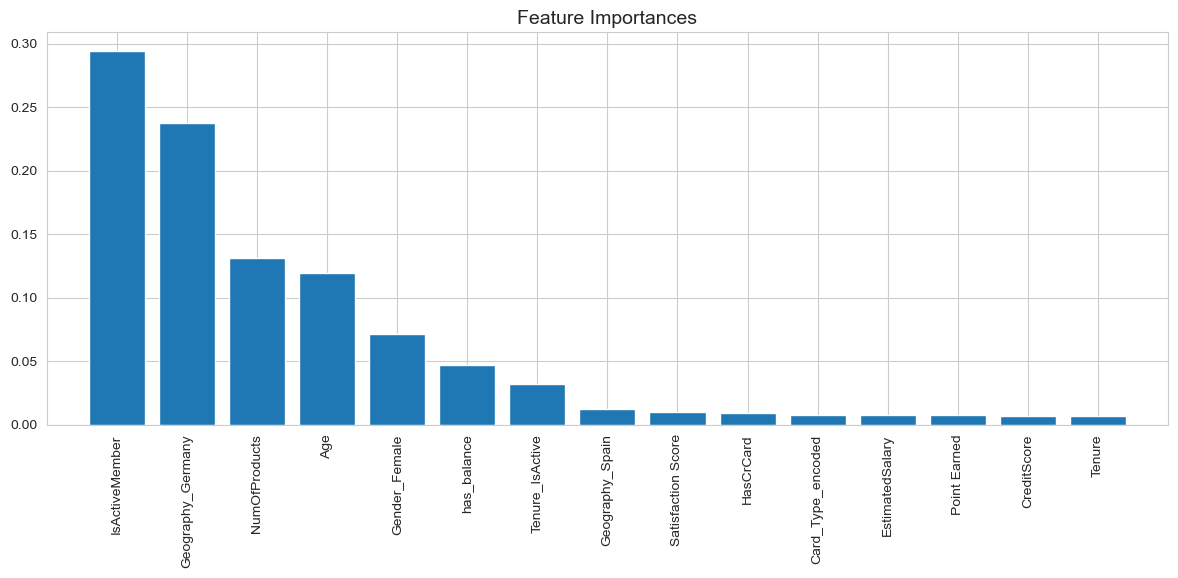

In [74]:
# Get feature importances
importances_xgb = best_xgb.feature_importances_
feature_names_xgb = x_train.columns

# Sort the importances in descending order
indices = np.argsort(importances_xgb)[::-1]

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(len(indices)), importances_xgb[indices], align="center")
plt.xticks(range(len(indices)), feature_names_xgb[indices], rotation=90)
plt.xlim([-1, len(indices)])
plt.tight_layout()
plt.show()

### 2.5 XGBoosting with Top 4 Important Features  

In [115]:
# 1. Identify the top 4 features from the best model
indices = np.argsort(importances_xgb)[::-1]
top_features = x_train.columns[indices[:4]]
print("Top 4 features:", top_features.tolist())

Top 4 features: ['IsActiveMember', 'Geography_Germany', 'NumOfProducts', 'Age']


In [109]:
# 2. Create a new training dataset with only these top features
x_top = x_res[top_features]
x_val_top = x_val[top_features]

# 3. Re-run using only the top 6 features
param_grid = {
    'n_estimators': [400, 500, 600],
    'max_depth': [10, 14, 20],
    'learning_rate': [0.001],
    'subsample': [0.4],
    'colsample_bytree': [0.7],
    'reg_alpha': [0],    # L1 regularization term
    'reg_lambda': [8, 10]    # L2 regularization term
}

grid = ParameterGrid(param_grid)
# Initialize variables to store the best results
best_recall = -1.0
best_params = None
best_model = None

# Iterate over each parameter combination in the grid
for params in grid:
    # Train model using our function that handles early stopping correctly
    model = train_xgb_model_with_early_stopping(
        x_top, y_res, 
        x_val_top, y_val, 
        params
    )
    y_pred = model.predict(x_val_top)
    
    # Compute the recall score on the validation set
    current_recall = recall_score(y_val, y_pred)
    print(f"Params: {params} | Recall: {current_recall:.4f}")
    if current_recall > best_recall:
        best_recall = current_recall
        best_params = params
        best_model = model

# Assign the best model and parameters
best_xgb_top = best_model
best_xgb__top_params = best_params

# Display the best parameters and validation performance
print("\nBest parameters:", best_params)
print(f"Best Recall on validation set: {best_recall:.4f}")
print("\nValidation Set Classification Report:")
print(classification_report(y_val, best_xgb_top.predict(x_val_top)))

Params: {'colsample_bytree': 0.7, 'learning_rate': 0.001, 'max_depth': 10, 'n_estimators': 400, 'reg_alpha': 0, 'reg_lambda': 8, 'subsample': 0.4} | Recall: 0.7209
Params: {'colsample_bytree': 0.7, 'learning_rate': 0.001, 'max_depth': 10, 'n_estimators': 400, 'reg_alpha': 0, 'reg_lambda': 10, 'subsample': 0.4} | Recall: 0.7209
Params: {'colsample_bytree': 0.7, 'learning_rate': 0.001, 'max_depth': 10, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 8, 'subsample': 0.4} | Recall: 0.7239
Params: {'colsample_bytree': 0.7, 'learning_rate': 0.001, 'max_depth': 10, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 10, 'subsample': 0.4} | Recall: 0.7239
Params: {'colsample_bytree': 0.7, 'learning_rate': 0.001, 'max_depth': 10, 'n_estimators': 600, 'reg_alpha': 0, 'reg_lambda': 8, 'subsample': 0.4} | Recall: 0.7209
Params: {'colsample_bytree': 0.7, 'learning_rate': 0.001, 'max_depth': 10, 'n_estimators': 600, 'reg_alpha': 0, 'reg_lambda': 10, 'subsample': 0.4} | Recall: 0.7209
Params: {'col

### 3. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Create a pipeline that first scales the features and then applies Logistic Regression
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(penalty='l2', random_state=42, max_iter=100))
])

# Define a parameter grid for the classifier within the pipeline
param_grid = {
    'classifier__C': [0.0001, 0.001, 0.01, 0.1],  # Inverse of regularization strength
    'classifier__solver': ['liblinear', 'lbfgs']
}

# Set up GridSearchCV to optimize for recall using 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=pipeline_lr,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search on the training data
grid_search.fit(x_res, y_res)

print("Best parameters found:", grid_search.best_params_)
print("Best validation recall: {:.4f}".format(grid_search.best_score_))

# Retrieve the best estimator from grid search
best_lr = grid_search.best_estimator_
best_lr_params = grid_search.best_params_

# Evaluate the best model on the validation set
print("Evaluate on the validation set:")
y_pred = best_lr.predict(x_val)
print(classification_report(y_val, y_pred))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found: {'classifier__C': 0.0001, 'classifier__solver': 'liblinear'}
Best validation recall: 0.7278
Evaluate on the validation set:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1274
           1       0.38      0.60      0.47       326

    accuracy                           0.72      1600
   macro avg       0.63      0.68      0.64      1600
weighted avg       0.78      0.72      0.74      1600



### 4. Support Vector Machine

In [122]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Create the correct pipeline
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=42))
])

# Define the parameter grid
param_grid = {
    'svc__C': [1, 2, 5],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__degree': [2, 3, 4],
    'svc__gamma': ['scale', 'auto']
}

# Ensure GridSearchCV uses the correct pipeline
grid_search = GridSearchCV(
    estimator=pipeline_svm,  # Use pipeline_svm 
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

# Fit on the training data
grid_search.fit(x_res, y_res)

# Print results
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation recall: {:.4f}".format(grid_search.best_score_), '\n')

# Get the best model
best_svm = grid_search.best_estimator_
best_svm_params = grid_search.best_params_

# Evaluate on the test set
print("Evaluate on the validation set:")
y_pred = best_svm.predict(x_val)
print(classification_report(y_val, y_pred))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found: {'svc__C': 5, 'svc__degree': 2, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best cross-validation recall: 0.7791 

Evaluate on the validation set:
              precision    recall  f1-score   support

           0       0.90      0.84      0.86      1274
           1       0.49      0.62      0.55       326

    accuracy                           0.79      1600
   macro avg       0.69      0.73      0.71      1600
weighted avg       0.81      0.79      0.80      1600



### 5. Stacking All the Models

In [ ]:
#Train the models with its best fine tuning

#Model 1: Random Forest
final_rf = RandomForestClassifier(
    n_estimators=best_rf_params['n_estimators'],
    max_depth=best_rf_params['max_depth'],
    min_samples_split=best_rf_params['min_samples_split'],
    min_samples_leaf=best_rf_params['min_samples_leaf'],
    random_state=42
)
final_rf.fit(x_res, y_res)

#Model 2: Xboosting 
final_xgb = XGBClassifier(
    n_estimators=best_xgb_params['n_estimators'],
    max_depth=best_xgb_params['max_depth'],
    learning_rate=best_xgb_params['learning_rate'],
    subsample=best_xgb_params['subsample'],
    colsample_bytree=best_xgb_params['colsample_bytree'],
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
final_xgb.fit(x_res, y_res)

#Model 3: Support Vector Machine
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=42, probability= True))
])
final_pipeline.set_params(**best_svm_params)
final_pipeline.fit(x_res, y_res)

c:\Users\gpnc_\anaconda4\lib\site-packages\xgboost\core.py:158: UserWarning: [16:25:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=5, degree=2, probability=True, random_state=42))])

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score

x_res_val, y_res_val = pipeline.fit_resample(x_val, y_val) #Train the stacking with the balance validation set

# Create a list of base estimators for the stacking model.
estimators = [
    ('rf', final_rf),
    ('xgb', final_xgb),
    ('svm', final_pipeline)
]

# Initialize the StackingClassifier.
stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(random_state=42, max_iter=1000),
    cv=5,          # Cross-validation for meta-model training
    n_jobs=-1,
    passthrough=False  # Set to True if you want to include original features alongside predictions from base models
)

param_grid = {
    'final_estimator__C': [0.01, 0.1],
    'final_estimator__solver': ['lbfgs', 'liblinear']
}

grid_search = GridSearchCV(
    estimator=stack_model,
    param_grid=param_grid,
    cv=5,
    scoring='recall',  # Optimizing for recall
    n_jobs=-1,
    verbose=1
)

grid_search.fit(x_res_val, y_res_val)

# Output the best parameters and corresponding best recall score
print("Best parameters found:", grid_search.best_params_)
print("Best Recall from CV: {:.4f}".format(grid_search.best_score_))

# Retrieve the best stacking model from grid search
best_stack_model = grid_search.best_estimator_
best_stack_model_params = grid_search.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters found: {'final_estimator__C': 0.01, 'final_estimator__solver': 'liblinear'}
Best Recall from CV: 0.8853


In [146]:
best_stack_model.fit(x_res_val, y_res_val)

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=200,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.7, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              gro...
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=500, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('svm',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('svc',
                                                 SVC(C=5, degree=2,
                                                     probability=True,
                                                     random_state=42))]))],
                   final_estimator=LogisticRegression(C=0.01, max_iter=1000,
                                                      random_state=42,
                                                      solver='liblinear'),
                   n_jobs=-1)

## 4. Final Model Results

In [148]:
# Optionally, evaluate the best model on the original validation set
y_pred = best_stack_model.predict(x_test)
print("Validation Set Classification Report:")
print(classification_report(y_test, y_pred))

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.71      0.81      1592
           1       0.41      0.78      0.54       408

    accuracy                           0.73      2000
   macro avg       0.67      0.75      0.67      2000
weighted avg       0.82      0.73      0.75      2000



## 4. CAUSAL INFERENCE

- **Treatment Definition & Data Preparation:**
  - Define the treatment variable as having more than 2 products and set the outcome as customer churn.
  - Prepare confounders by one-hot encoding categorical features (e.g., Geography, Gender), mapping card types, and standardizing numerical variables.

- **Causal Effect Estimation:**
  - Apply various causal inference methods—X-Learner, T-Learner, S-Learner, and R-Learner—to estimate individual treatment effects (ITE) and average treatment effects (ATE).

- **Performance Evaluation:**
  - Create a predictions dataframe aggregating results from all learners.
  - Compute and plot cumulative gains, and calculate AUUC scores to assess each model’s ability to differentiate between customers affected by the treatment.

- **Model Interpretation:**
  - Derive feature importances and SHAP values using a T-Learner approach with an XGBoost base model.

In [ ]:
#pip install causalml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.8 MB/s eta 0:00:00


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from causalml.inference.meta import BaseXRegressor, BaseRRegressor, BaseTRegressor, BaseSRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import numpy as np

In [4]:
#Define Treatment Variable
T = df['NumOfProducts'].apply(lambda x: 1 if x>2 else 0) #Determine the effect of having more than 2 products on churning

#Define the outcome variable (Exited - Churn)
Y = df['Exited'].astype(int)

#Define Confounders (Control Variables)
X = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary',
       'Satisfaction Score', 'Card Type', 'Point Earned']]

#One-hot encode categorical
X = pd.get_dummies(X, columns=['Geography','Gender'], drop_first=True)

#Mapping credit card type
mapping = {'SILVER': 0, 'GOLD': 1, 'PLATINUM': 2, 'DIAMOND': 3}
X['Card_Type_encoded'] = X['Card Type'].map(mapping)
X = X.drop(columns=['Card Type'])

#Drop the treatment variable from X
X = X.drop(columns=['NumOfProducts'])

#Standarize numerical features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns=X.columns)

In [7]:
# Define base models for treatment & control
learner_t = XGBRegressor()
learner_c = XGBRegressor()

# Initialize X-Learner
x_learner = BaseXRegressor(learner_t, learner_c)

# Fit and Predict Individual Treatment Effects (ITE)
ite_x = x_learner.fit_predict(X, T, Y)

# Estimate Average Treatment Effect (ATE)
ate_x = np.mean(ite_x)
print(f"Estimated ATE using X-Learner: {ate_x:.4f}")

#Conclusion: Havinfg more products increases the probability of churning by 0.5

Estimated ATE using X-Learner: 0.5799


In [8]:
# Define base models
t_learner = BaseTRegressor(learner=XGBRegressor())

# Fit and Predict ITE
ite_t = t_learner.fit_predict(X, T, Y)

# Estimate ATE
ate_t = np.mean(ite_t)
print(f"Estimated ATE using T-Learner: {ate_t:.4f}")

Estimated ATE using T-Learner: 0.5983


In [9]:
# Define base model
s_learner = BaseSRegressor(learner=XGBRegressor())

# Fit and Predict ITE
ite_s = s_learner.fit_predict(X, T, Y)

# Estimate ATE
ate_s = np.mean(ite_s)
print(f"Estimated ATE using S-Learner: {ate_s:.4f}")

Estimated ATE using S-Learner: 0.5664


In [10]:
# Define R-Learner
r_learner = BaseRRegressor(learner=XGBRegressor())

# Fit and Predict Individual Treatment Effects (ITE)
ite_r = r_learner.fit_predict(X, T, Y)

# Estimate Average Treatment Effect (ATE)
ate_r = np.mean(ite_r)
print(f"Estimated ATE (Continuous Treatment): {ate_r:.4f}")

Estimated ATE (Continuous Treatment): 0.5702


/var/folders/7z/47q7rxfx55x97dcz64l8v83m0000gn/T/ipykernel_13297/359309233.py:18: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  'y': Y.ravel(),
/var/folders/7z/47q7rxfx55x97dcz64l8v83m0000gn/T/ipykernel_13297/359309233.py:19: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  'w': T.ravel()


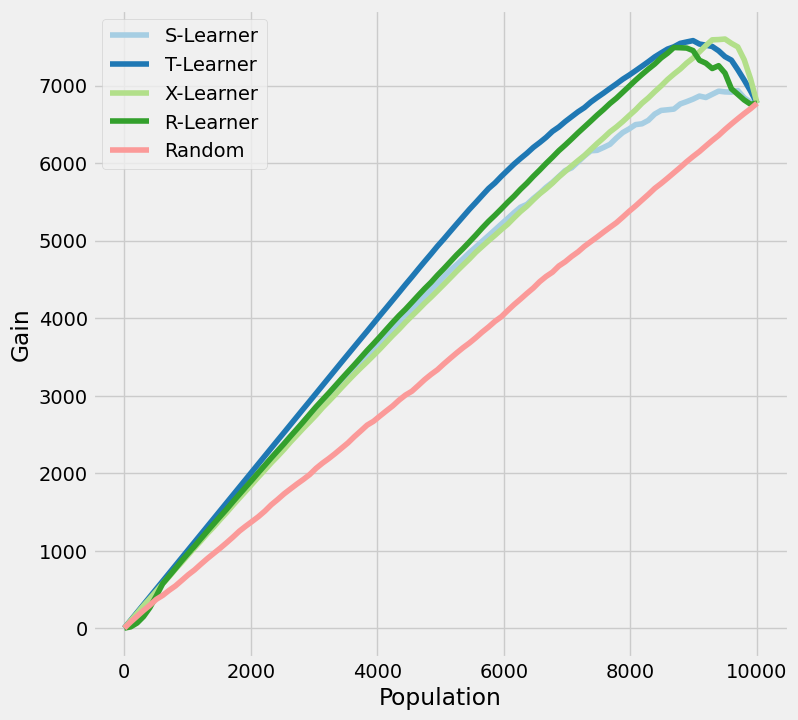

In [11]:
from causalml.metrics import *

#S-learner
x_ite_s = s_learner.fit_predict(X, T, Y)
#T-Learner
x_ite_t = t_learner.fit_predict(X, T, Y)
#X-learner
x_ite_x = x_learner.fit_predict(X, T, Y)
#R-learner
x_ite_r = r_learner.fit_predict(X, T, Y)

#Creation of the dataframe
df_preds = pd.DataFrame({
    'S-Learner': x_ite_s.ravel(),
    'T-Learner': x_ite_t.ravel(),
    'X-Learner': x_ite_x.ravel(),
    'R-Learner': x_ite_r.ravel(),
    'y': Y.ravel(),
    'w': T.ravel()
})

df_cumgain = get_cumgain(df_preds)

plot(df_preds)


In [18]:
df_result = pd.DataFrame([ate_s, ate_t, ate_x, ate_r],
                         index=['S','T','X','R'], columns=['ATE'])

auuc_scores = list(auuc_score(df_preds))
df_result['AUUC'] = auuc_scores[:4]
df_result


ATE      AUUC
S  0.566440  0.616129
T  0.598283  0.674897
X  0.579908  0.625187
R  0.570230  0.643387

T-Learner is the best model to predict which customers are most likely to churn due to having more than 2 products.

In [21]:
import matplotlib.pyplot as plt
#Model Interpretation with Feature Importance
plt.style.use('fivethirtyeight')

learner_t_x = BaseTRegressor(learner = XGBRegressor())
ate_t_x = learner_t_x.estimate_ate(X = X, treatment=T, y=Y)

learner_t_tau = learner_t_x.fit_predict(X, T, Y)

importances = learner_t_x.get_importance(X=X,
                        tau=learner_t_tau,
                        normalize=True,
                        method='auto',
                        features=X.columns)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

In [22]:
importances[1]


Age                   0.294664
Balance               0.230227
EstimatedSalary       0.175521
IsActiveMember        0.074194
CreditScore           0.062664
Tenure                0.060200
Geography_Germany     0.039558
Point Earned          0.033409
Gender_Male           0.008472
HasCrCard             0.007334
Card_Type_encoded     0.006908
Satisfaction Score    0.005642
Geography_Spain       0.001207
dtype: float64

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

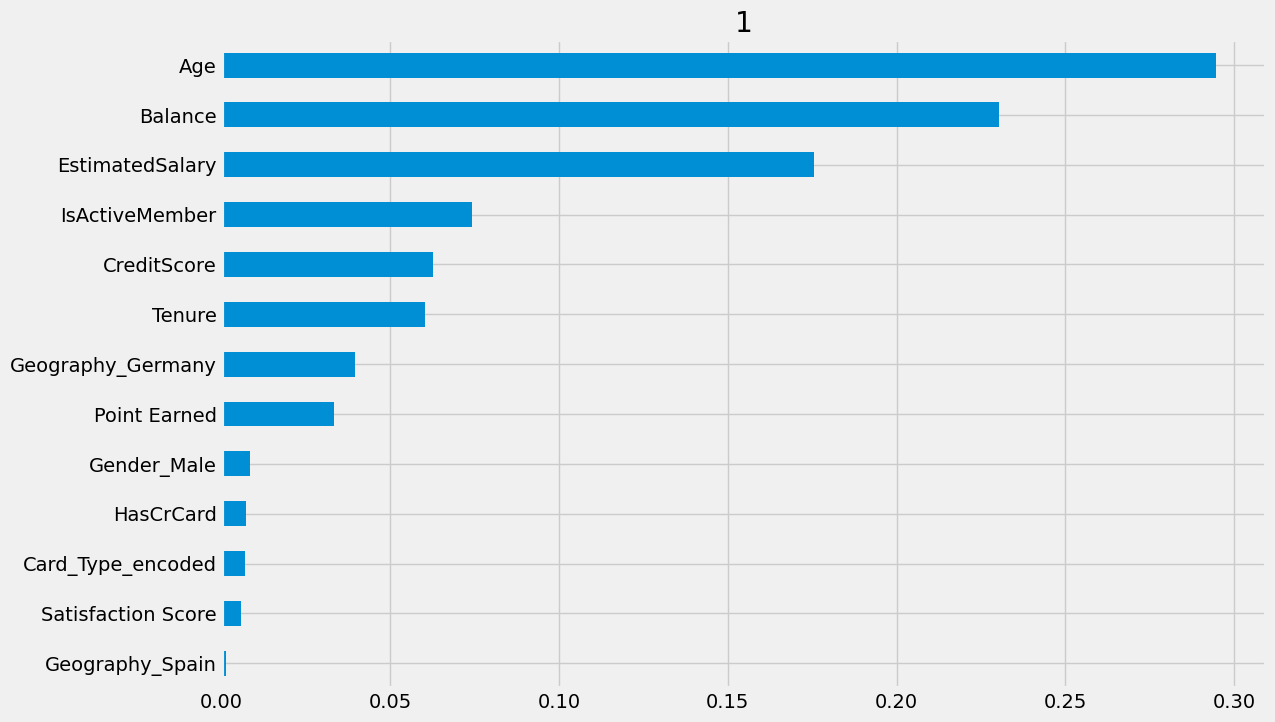

In [23]:
learner_t_x.plot_importance(X=X,
                         tau=learner_t_tau,
                         normalize=True,
                         method='auto',  #decided to use auto since it shows the importances from the XGBoost algorithm
                         features=X.columns)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

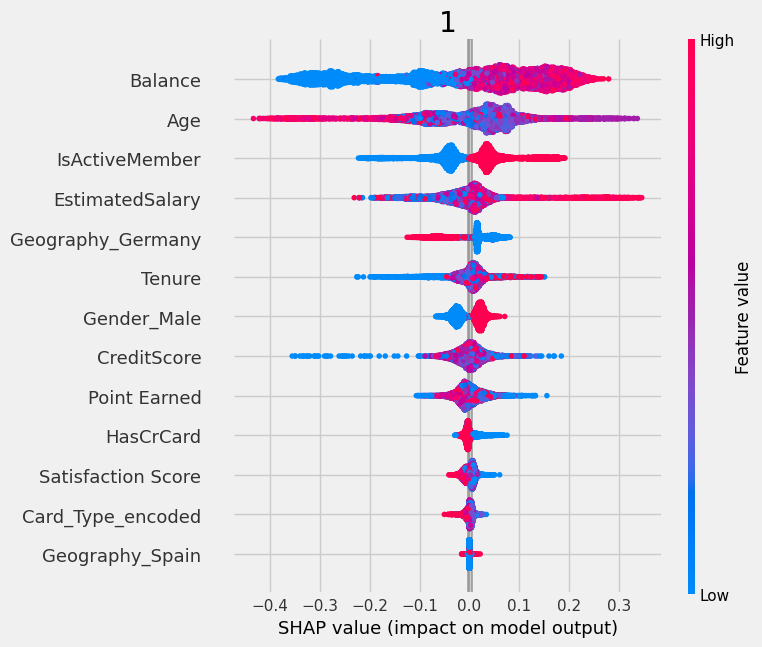

In [ ]:
#Shap Values
shap_tlearner = learner_t_x.get_shap_values(X=X, tau = learner_t_tau)
#shap_tlearner

feature_names = X.columns
# Plot shap values without specifying shap_dict
learner_t_x.plot_shap_values(X=X, tau=learner_t_tau, features=feature_names)


Based on the previous result, customers with the treatment (more than 2 products), with high balance level tend to have a higher likelihood of churning if compared with those with no balance. On the other side, as customers become older, the effect of having more than 2 products is reduced (over the likelihood of churning). As well, for customers with more than 2 products, the fact of being active, increases their likelihood of churning.

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

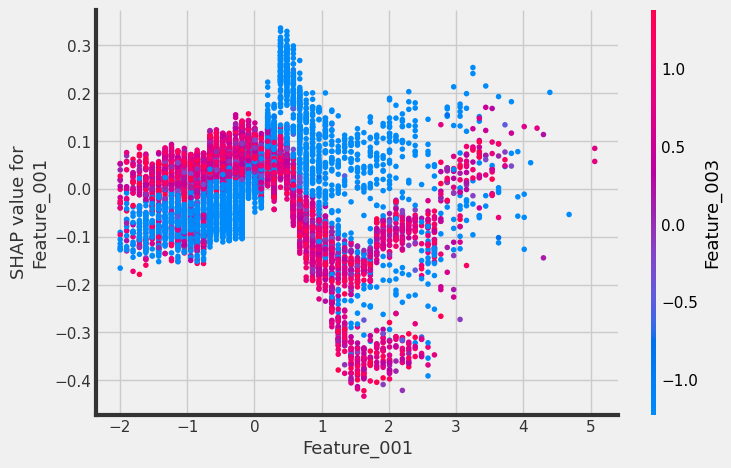

In [27]:
# interaction_idx set to 'auto' (searches for feature with greatest approximate interaction)
learner_t_x.plot_shap_dependence(treatment_group=1,
feature_idx=1,
X=X,
tau=learner_t_tau,
interaction_idx='auto')

In [29]:
import shap

# Get the SHAP feature names
feature_names = X.columns.tolist()

# Print the mapping of feature index to name
for i, name in enumerate(feature_names):
    print(f"Feature {i:03} -> {name}")



Feature 000 -> CreditScore
Feature 001 -> Age
Feature 002 -> Tenure
Feature 003 -> Balance
Feature 004 -> HasCrCard
Feature 005 -> IsActiveMember
Feature 006 -> EstimatedSalary
Feature 007 -> Satisfaction Score
Feature 008 -> Point Earned
Feature 009 -> Geography_Germany
Feature 010 -> Geography_Spain
Feature 011 -> Gender_Male
Feature 012 -> Card_Type_encoded


The previous graph, shows the interaction between age (feature 1) and balance (feature 3) and how the shap values interact with them. We can observe that for younger customers, those with higher balance in their account tend to have a higher likelihood of leaving the bank, given that they have more than 2 products. For older customers, the effect of leaving the bank for those that have higher balance in their account, given that they have more than 2 products, is reduced; in this scenario (older customers), the customers with higher likelihood of leaving the bank are those with less balance in their account.